In [9]:
from IPython.display import Image, display


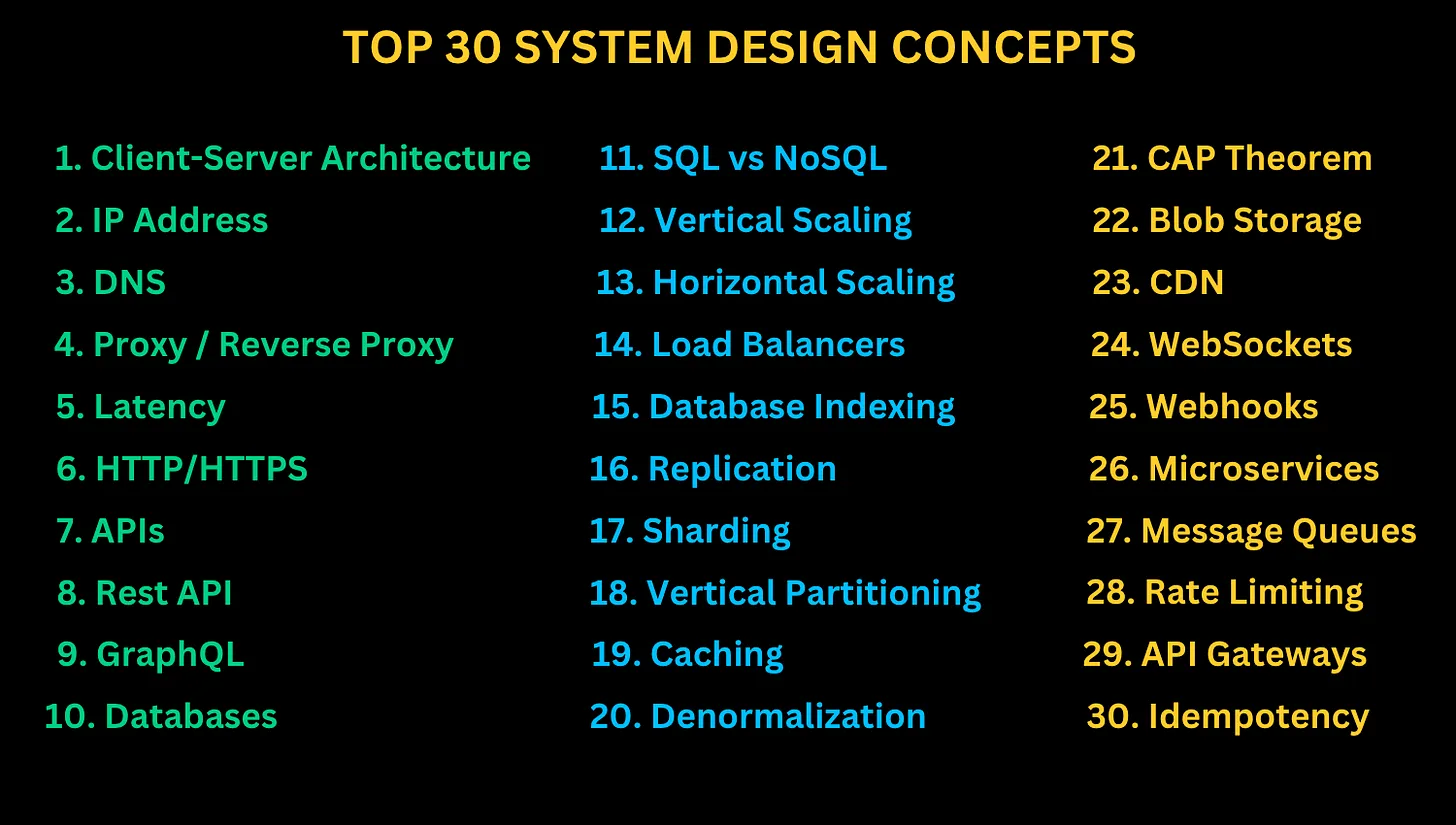

In [10]:
display(Image(filename='Utils/1.webp'))

## 1. Client-Server Architecture

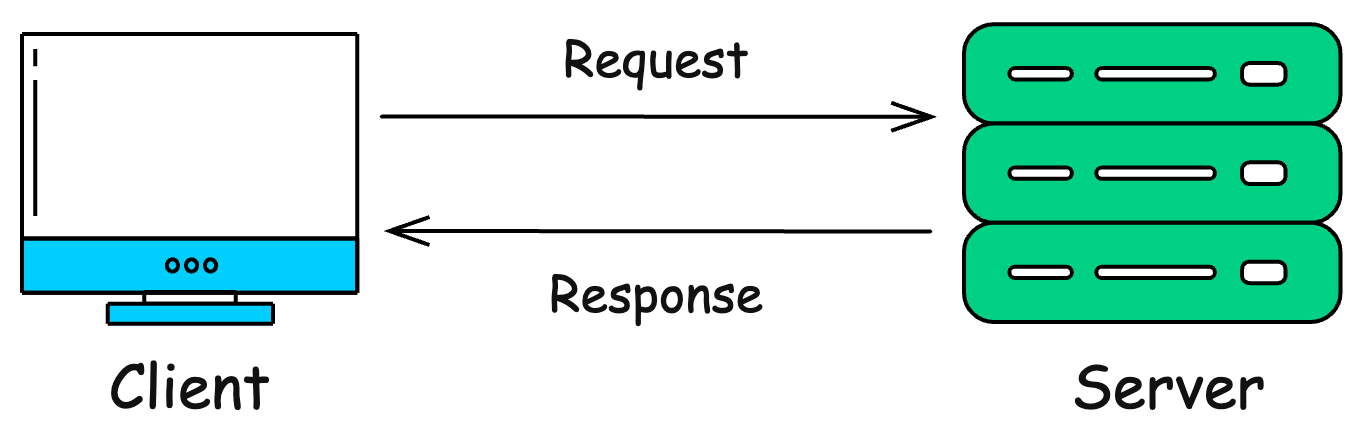

In [4]:
display(Image(filename='Utils/2.png'))

1. Client : 

    1. This could be any frontend application , web browser , any mobile app. 
    2. The client sends a request to store, retrieve, or modify data

2. Server : 

    1. A machine that runs continously and waiting to handle incoming requests.
    2. The server recieves the request , process it and performs the necessary operations
       and return the response.
    
But question ? arise , 

" How does the client even know where to find the server is ??? "

## 2. IP Address

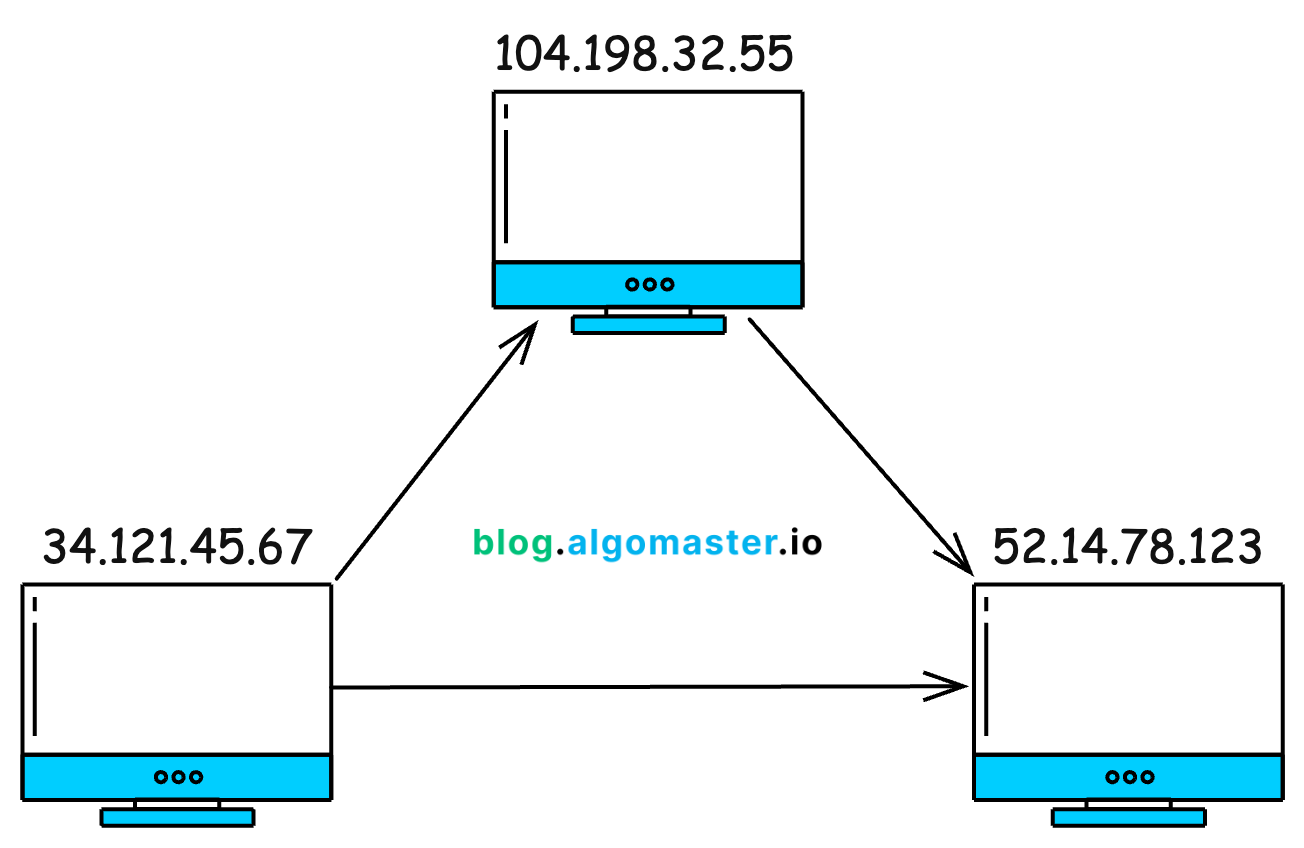

In [5]:
display(Image(filename='Utils/3.png'))

1. On the internet , computers identify each other using IP address.

2. A client does not magically knows where a server is , it needs an address to locate and 
   identify it and there IP address come into picture which acts like phone number for servers.

3. Every deployed server has an unique IP address , when a client want to interact with the service , it just send request it to correct IP address.

But there's a problem (: 
 
1. We can't expect users (or even systems) to remeber a string of random numbers , for every service they connect to.

2. Also on when we visit a website we type its name not IP address .

3. Let say you want to use a service and now recently the service migrates  to another server and there is a possibility that its IP address may be change which can lead to breaking all connections.







## 3. DNS 

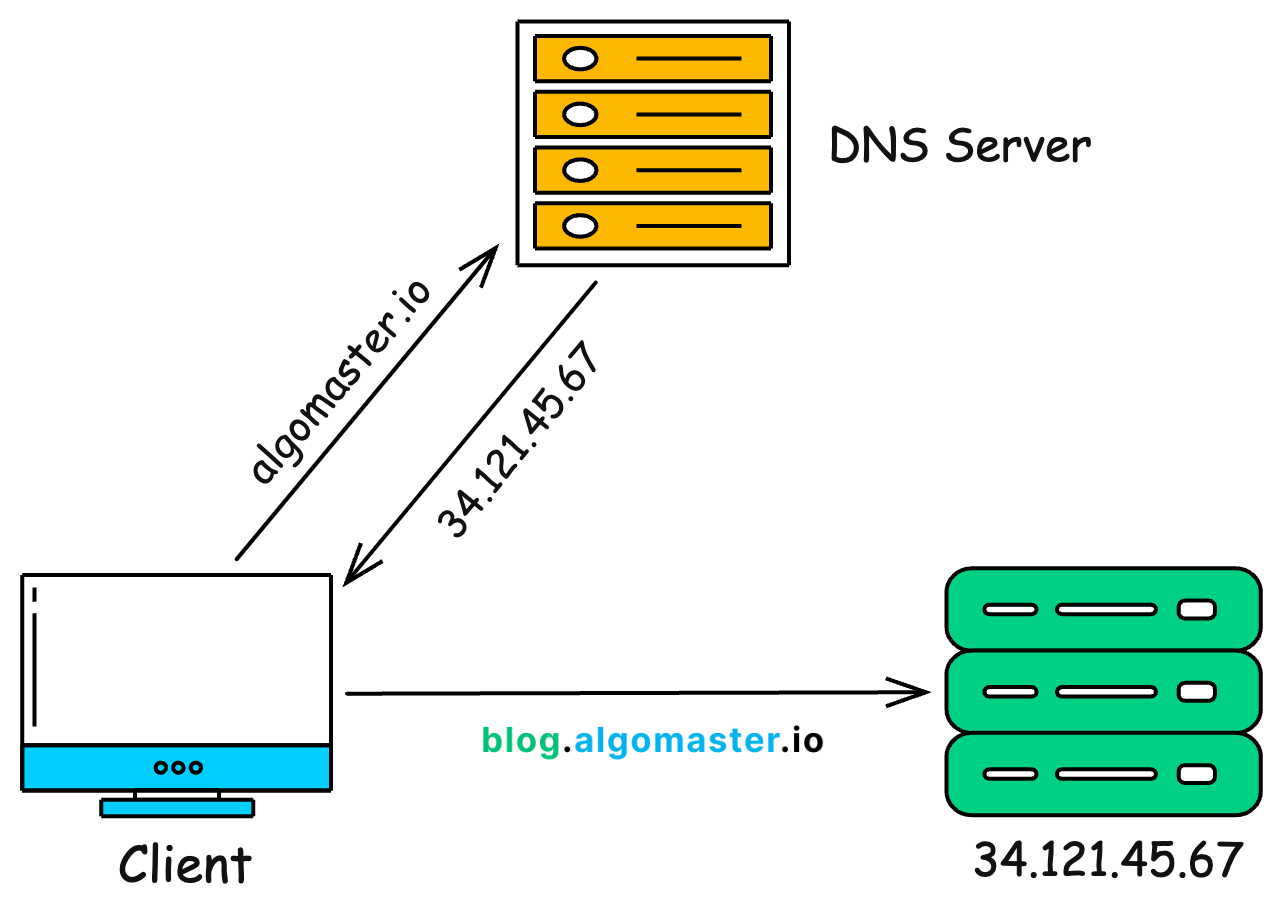

In [6]:
display(Image(filename='Utils/4.png'))

1. Instead of relying on remember IP address , we use something human friendly : domain names, But we need a way to map domain name's to its corresponding IP address.

2. This where DNS (Domain Name server) comes in picture.It maps easy to remember domain names (like google.com) to their corresponding IP addresses.

3. What's happens behind the scenes .
  
   1. When you type google.com in your browser , your computer ask DNS server for corresponding IP address . (Just check it out by type "ping google.com") in your terminal.

   2. Once the DNS server responds with the IP, your browser uses it to establish a connection with the server and make a request.



## 4. Proxy / Reverse Proxy

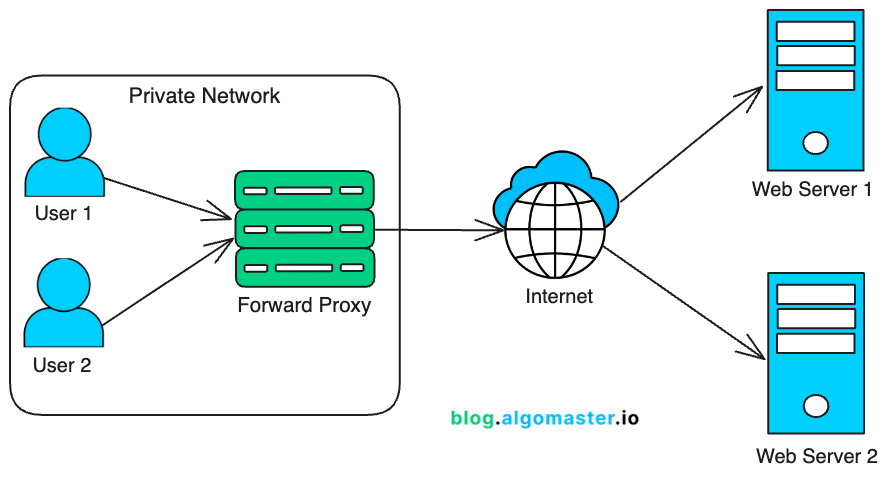

In [7]:
display(Image(filename='Utils/5.png'))

When you visit a website, your request doesn’t always go directly to the server—sometimes, it passes through a proxy or reverse proxy first.

1. A proxy server acts as a middleman between your device and the internet.

2. When you request a webpage, the proxy forwards your request to the target server, retrieves the response, and sends it back to you.

Why Proxy ??

1. Proxy hides your IP address, keeping your location and identity private.


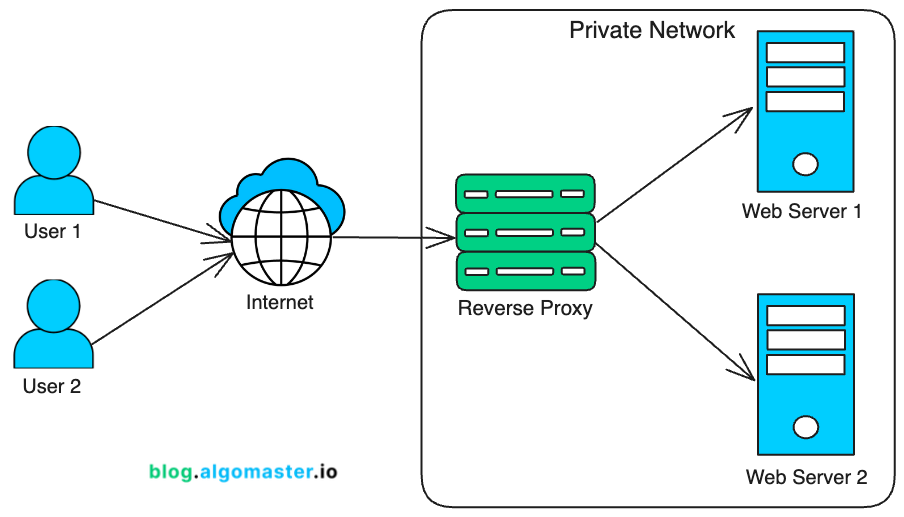

In [8]:
display(Image(filename='Utils/6.png'))

1. A reverse proxy works the other way around.It intercepts client requests and forwards them to backend servers based on predefined rule.

2. It can also act as a load balancer, distributing traffic across multiple servers.

Why Reverse Proxy ?? 

1. Allowing direct access to servers can pose security risks, exposing them to threats like hackers and DDoS attacks.

2. A reverse proxy mitigates these risks by acting as a controlled entry point that regulates incoming traffic and hides server IPs.


## 5. Latency 

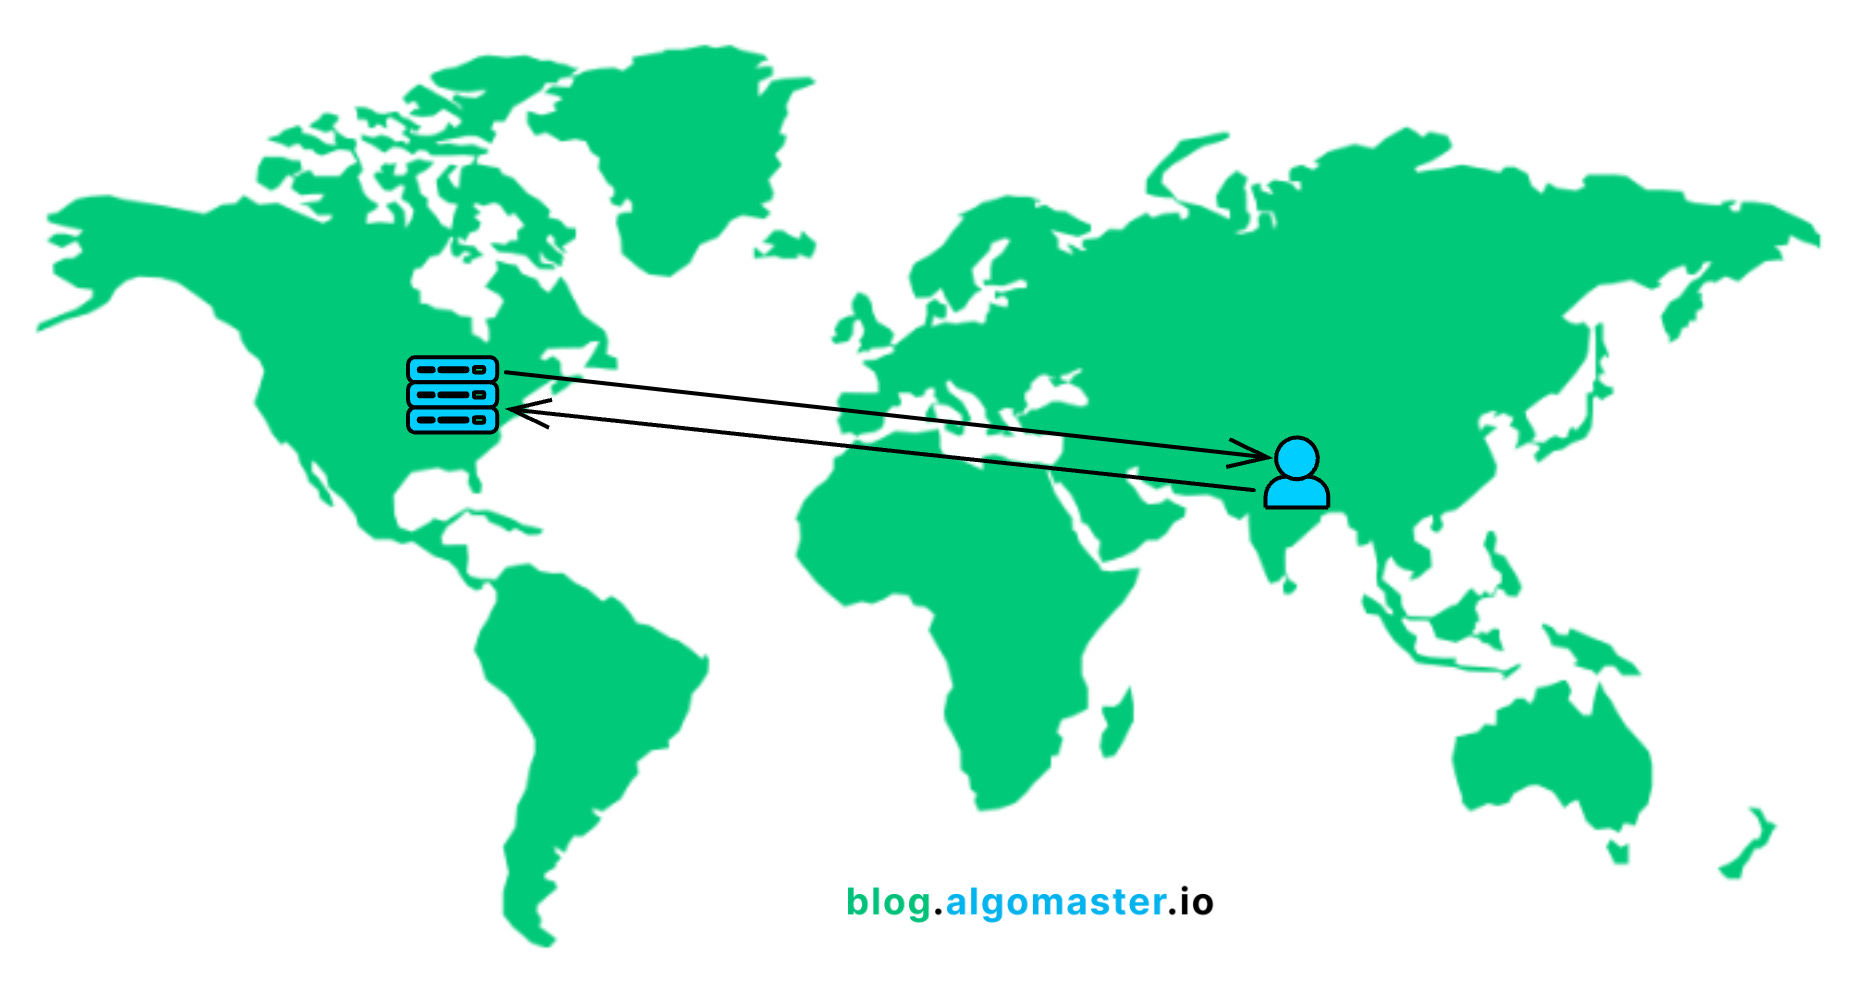

In [10]:
display(Image(filename='Utils/7.jpg'))

1. Whenever a client communicates with a server, there’s always some delay. One of the biggest causes of this delay is physical distance.

2. For example, if our server is in New York, but a user in India sends a request, the data has to travel halfway across the world and then the response has to make the same long trip back. This round-trip delay is called latency.

3. Latency : The total time it takes for data to travel between the client and the server. 

4. High latency can make applications feel slow and unresponsive.

5. One way to reduce latency is by deploying our service across multiple data centers worldwide. This way, users can connect to the nearest server instead of waiting for data to travel across the globe.


But the Question ?? arises

Once the connection is made , How do client and servers actually communicate ??


## 6. HTTP/HTTPS

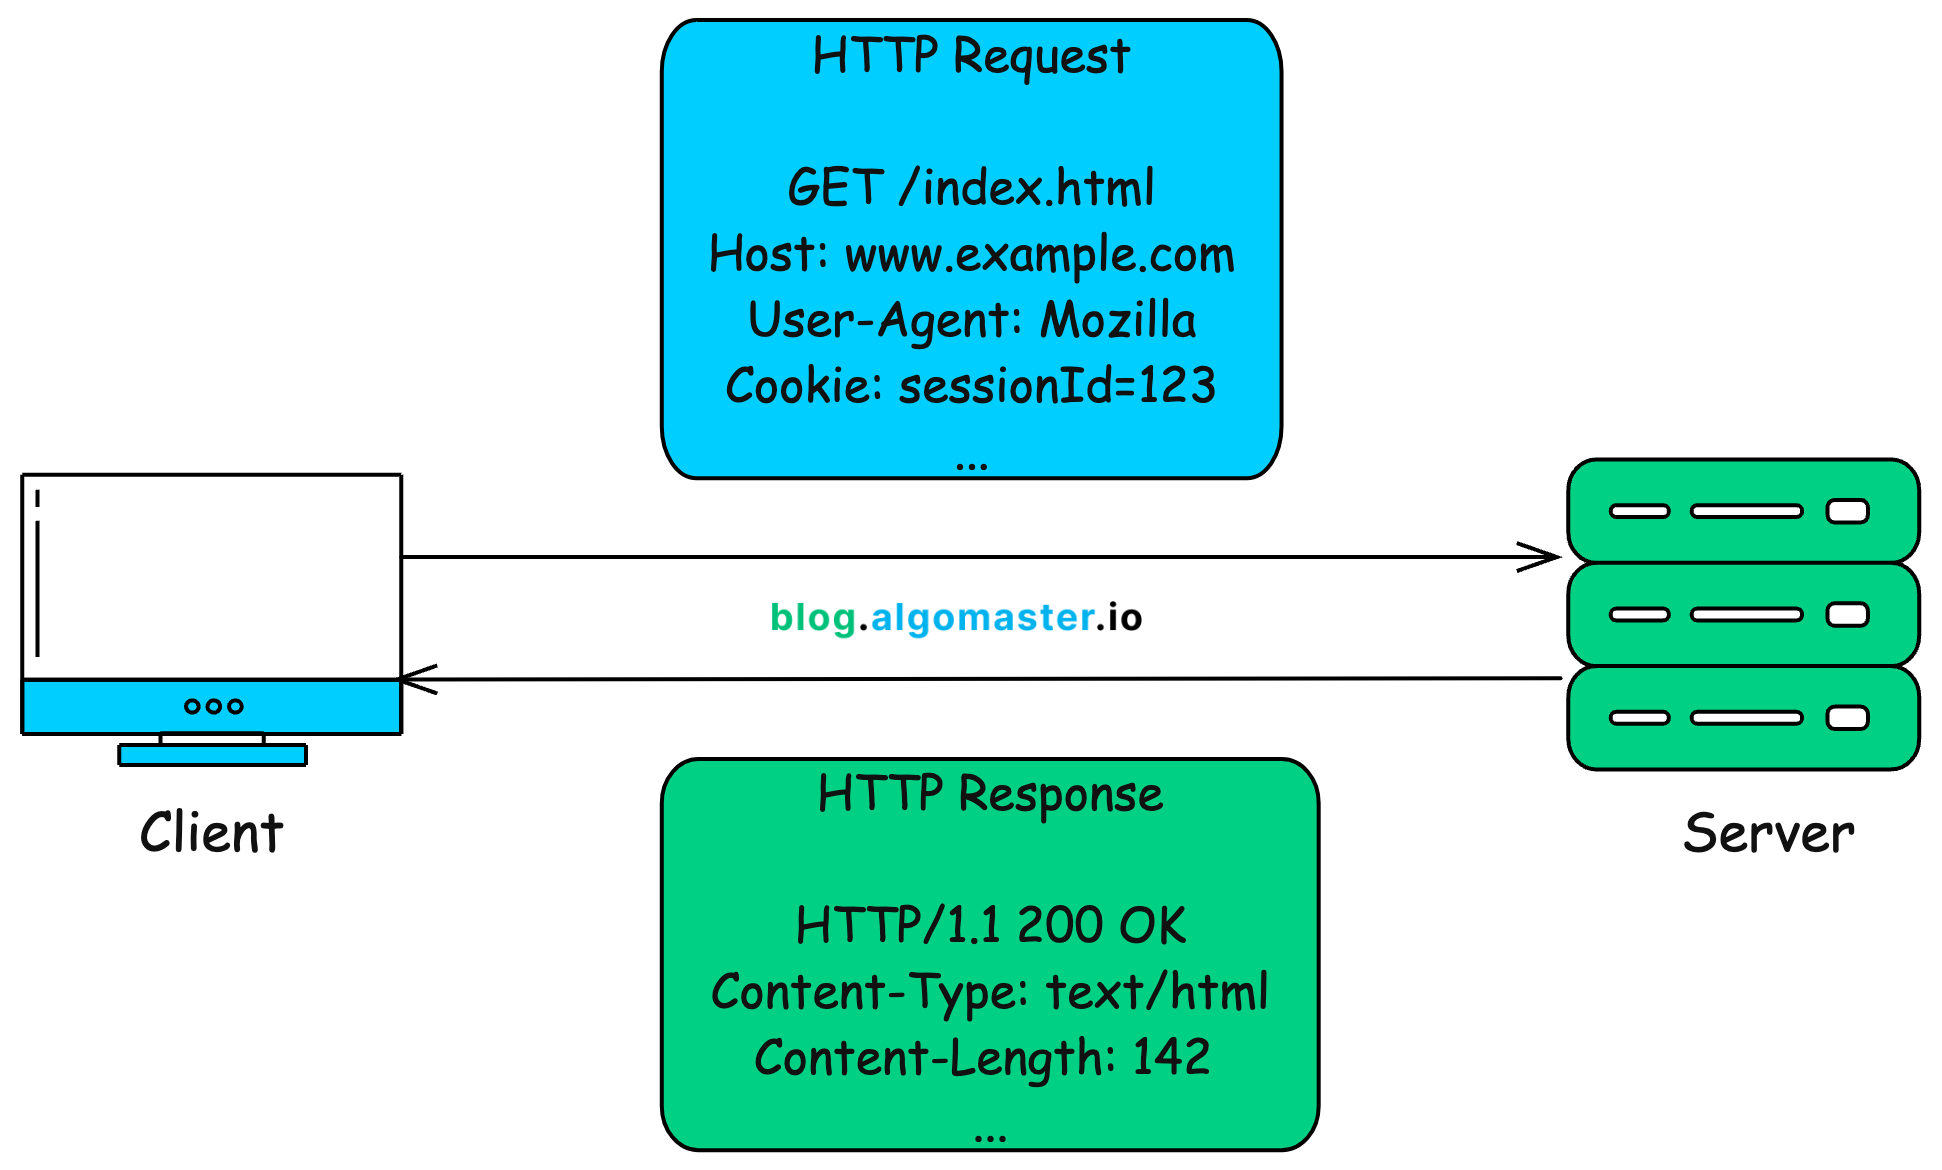

In [11]:
display(Image(filename='Utils/7.png'))

1. Every time you visit a website, your browser and the server communicate using a set of rules called HTTP (Hypertext Transfer Protocol). That’s why most URLs start with http:// or its secure version, https://.

How it works : 

1. The client sends a request to the server. This request includes a header (containing details like the request type, browser type, and cookies) and sometimes a request body (which carries additional data, like form inputs).

2. The server processes the request and responds with an HTTP response—either returning the requested data or an error message if something goes wrong.

But HTTP has a major flaw , it sends data in plainm text and this is a serious problem, especially for sensitive information like passwords, credit card details, and personal data.

That's why modern websites use HTTPS (Hypertext Transfer Protocol Secure) instead.

1.  HTTPS encrypts all data using SSL/TLS, ensuring that even if someone intercepts the request, they can’t read or alter it.

But But ....

1. Clients and servers don’t directly exchange raw HTTP requests and response.

2. HTTP is just a protocol for transferring data but it doesn’t define:

    1. How requests should be structured
    2. What format responses should be in
    3. how different clients should interact with the server.

For that APIs (or Application Programming Interfaces) come in.


# 7. APIs


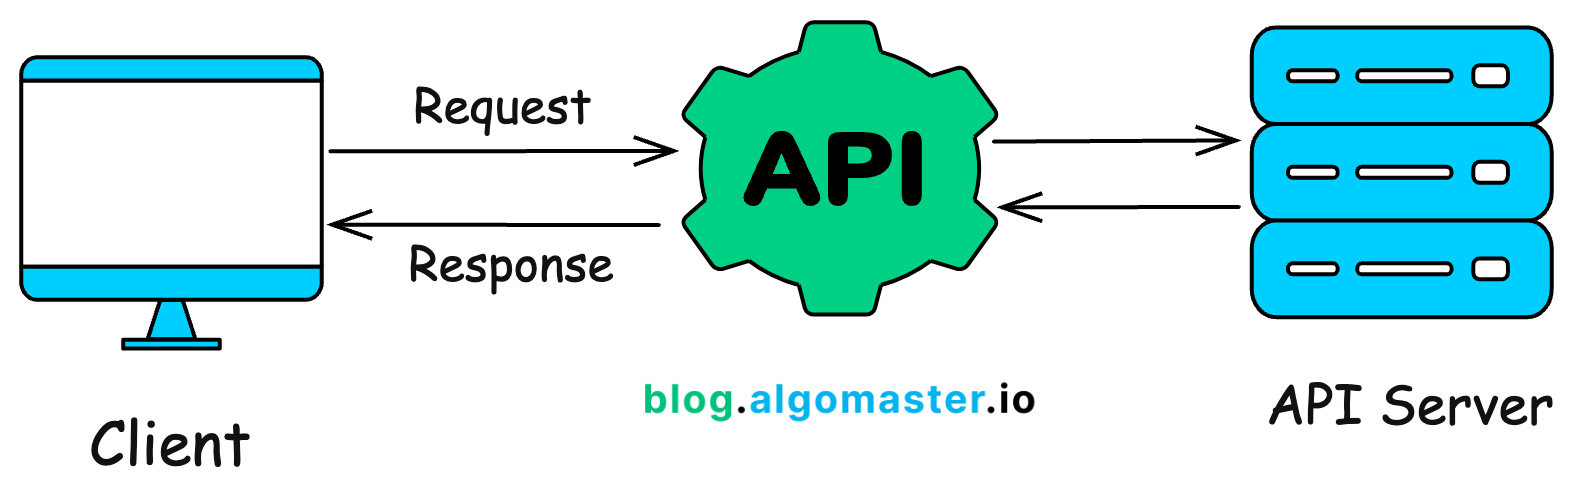

In [12]:
display(Image(filename='Utils/8.png'))

1. API act as a middleman that allows clients (like web and mobile apps) to communicate with servers without worrying about low-level details.

2. Almost every digital service you use—social media, e-commerce, online banking, ride-hailing apps—is built on APIs working together behind the scenes.

3. APIs provide a layer of abstraction—the client doesn’t need to know how the server processes the request, only that it returns the expected data.Example : 
you just call an api endpoint like this , GET https://weatherapp.com/api/weather?city=Delhi




How it works : 

1. A client sends a request to an API.

  ``` 
      GET /api/weather?city=Delhi HTTP/1.1
      Host: weatherapp.com
      User-Agent: Chrome
      Accept: application/json
  ```

 2. The API, hosted on a server, processes the request, interacts with databases or other services, and prepares a response.

  ```
     @app.get("/api/weather")
      def get_weather(city: str):
            # This is the API logic
            weather = {"city": city, "temperature": 30, "condition": "Sunny"}
            return weather
   ```

 3. The API sends back the response in a structured format, usually JSON or XML, which the client understands and can display.

   ```
      HTTP/1.1 200 OK
      Content-Type: application/json
   ```

      Json :

            ```
            {
                  "city": "Delhi",
                  "temperature": 30,
                   "condition": "Sunny"
             }

            ```


But But ...

1. Not all APIs are built the same.

2. Different API styles exist to serve different needs. Two of the most popular ones are REST and GraphQL.

# 8. RestAPI

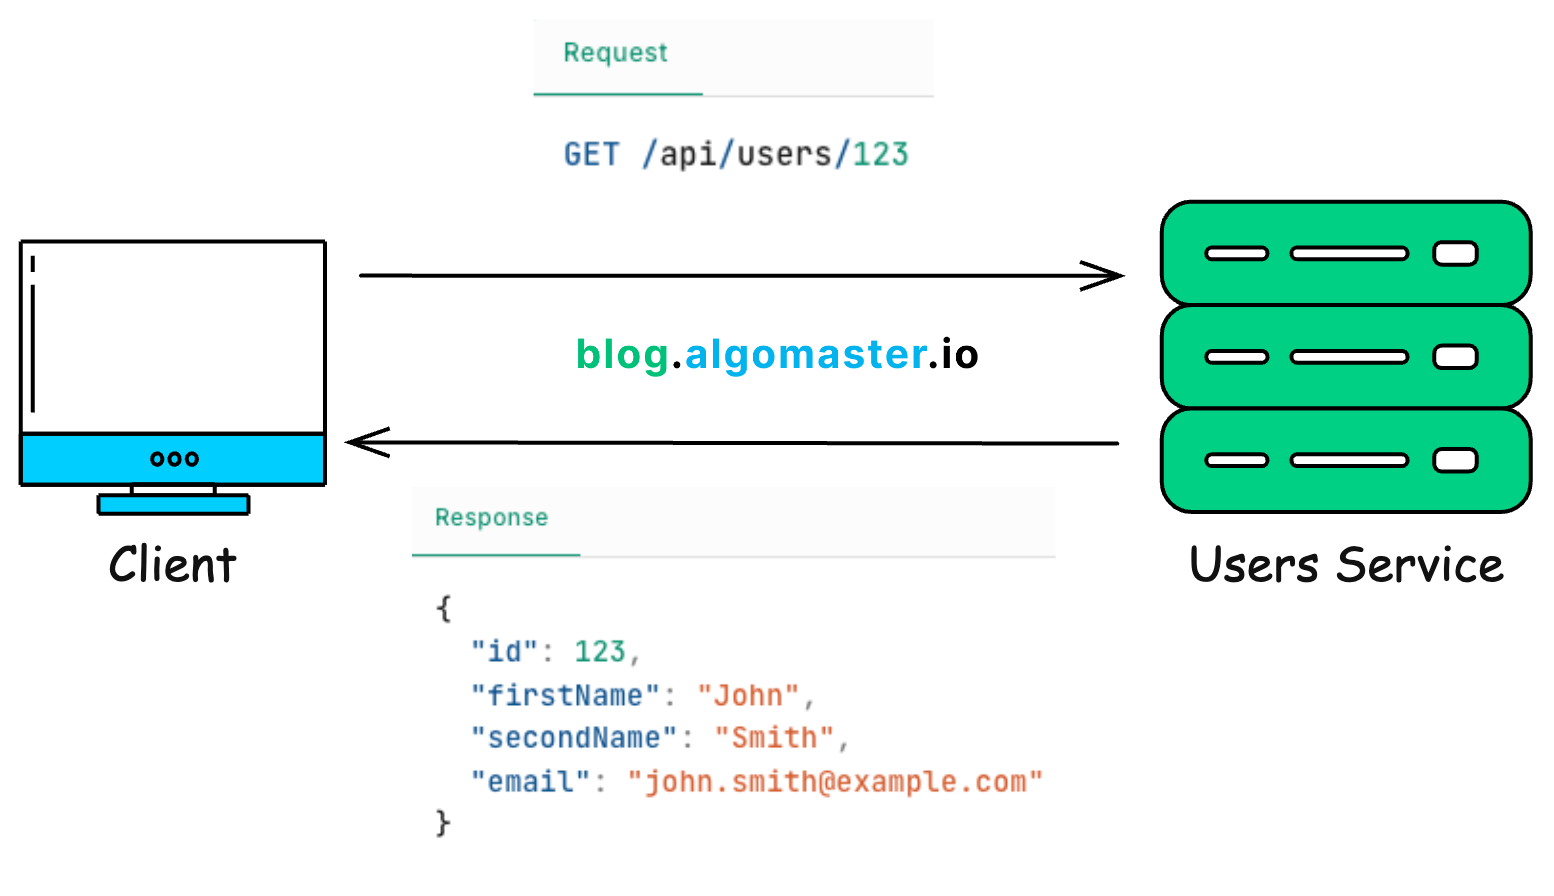

In [13]:
display(Image(filename='Utils/9.png'))

1. A REST (Representational State Transfer) API follows a set of rules that define how clients and servers communicate over HTTP in a structured way.

2. Key things about Rest : 

  1. Stateless: Every request is independent; the server doesn’t store client state.

  2. Resource-Based: Everything is treated as a resource (e.g., /users, /orders, /products).

  3. Uses Standard HTTP Methods: Clients interact with resources using HTTP methods like:
    
    1. GET → Retrieves data (e.g., fetching a user profile).
    2. POST → Creates new data (e.g., adding a new user).
    3. PUT/PATCH → Updates existing data (e.g., changing user settings).
    4. DELETE → Removes data (e.g., deleting an account).

3. REST APIs are great because they’re simple, scalable, and easy to cache.

But But ... they have limitations, especially when dealing with complex data retrieval.

1. REST endpoints often return more data than needed, leading to inefficient network usage.

2. If an API doesn’t return related data, the client may need to make multiple requests to retrieve all required information.

To address these challenges, GraphQL was introduced in 2015 by Facebook.

# 9. GraphQL

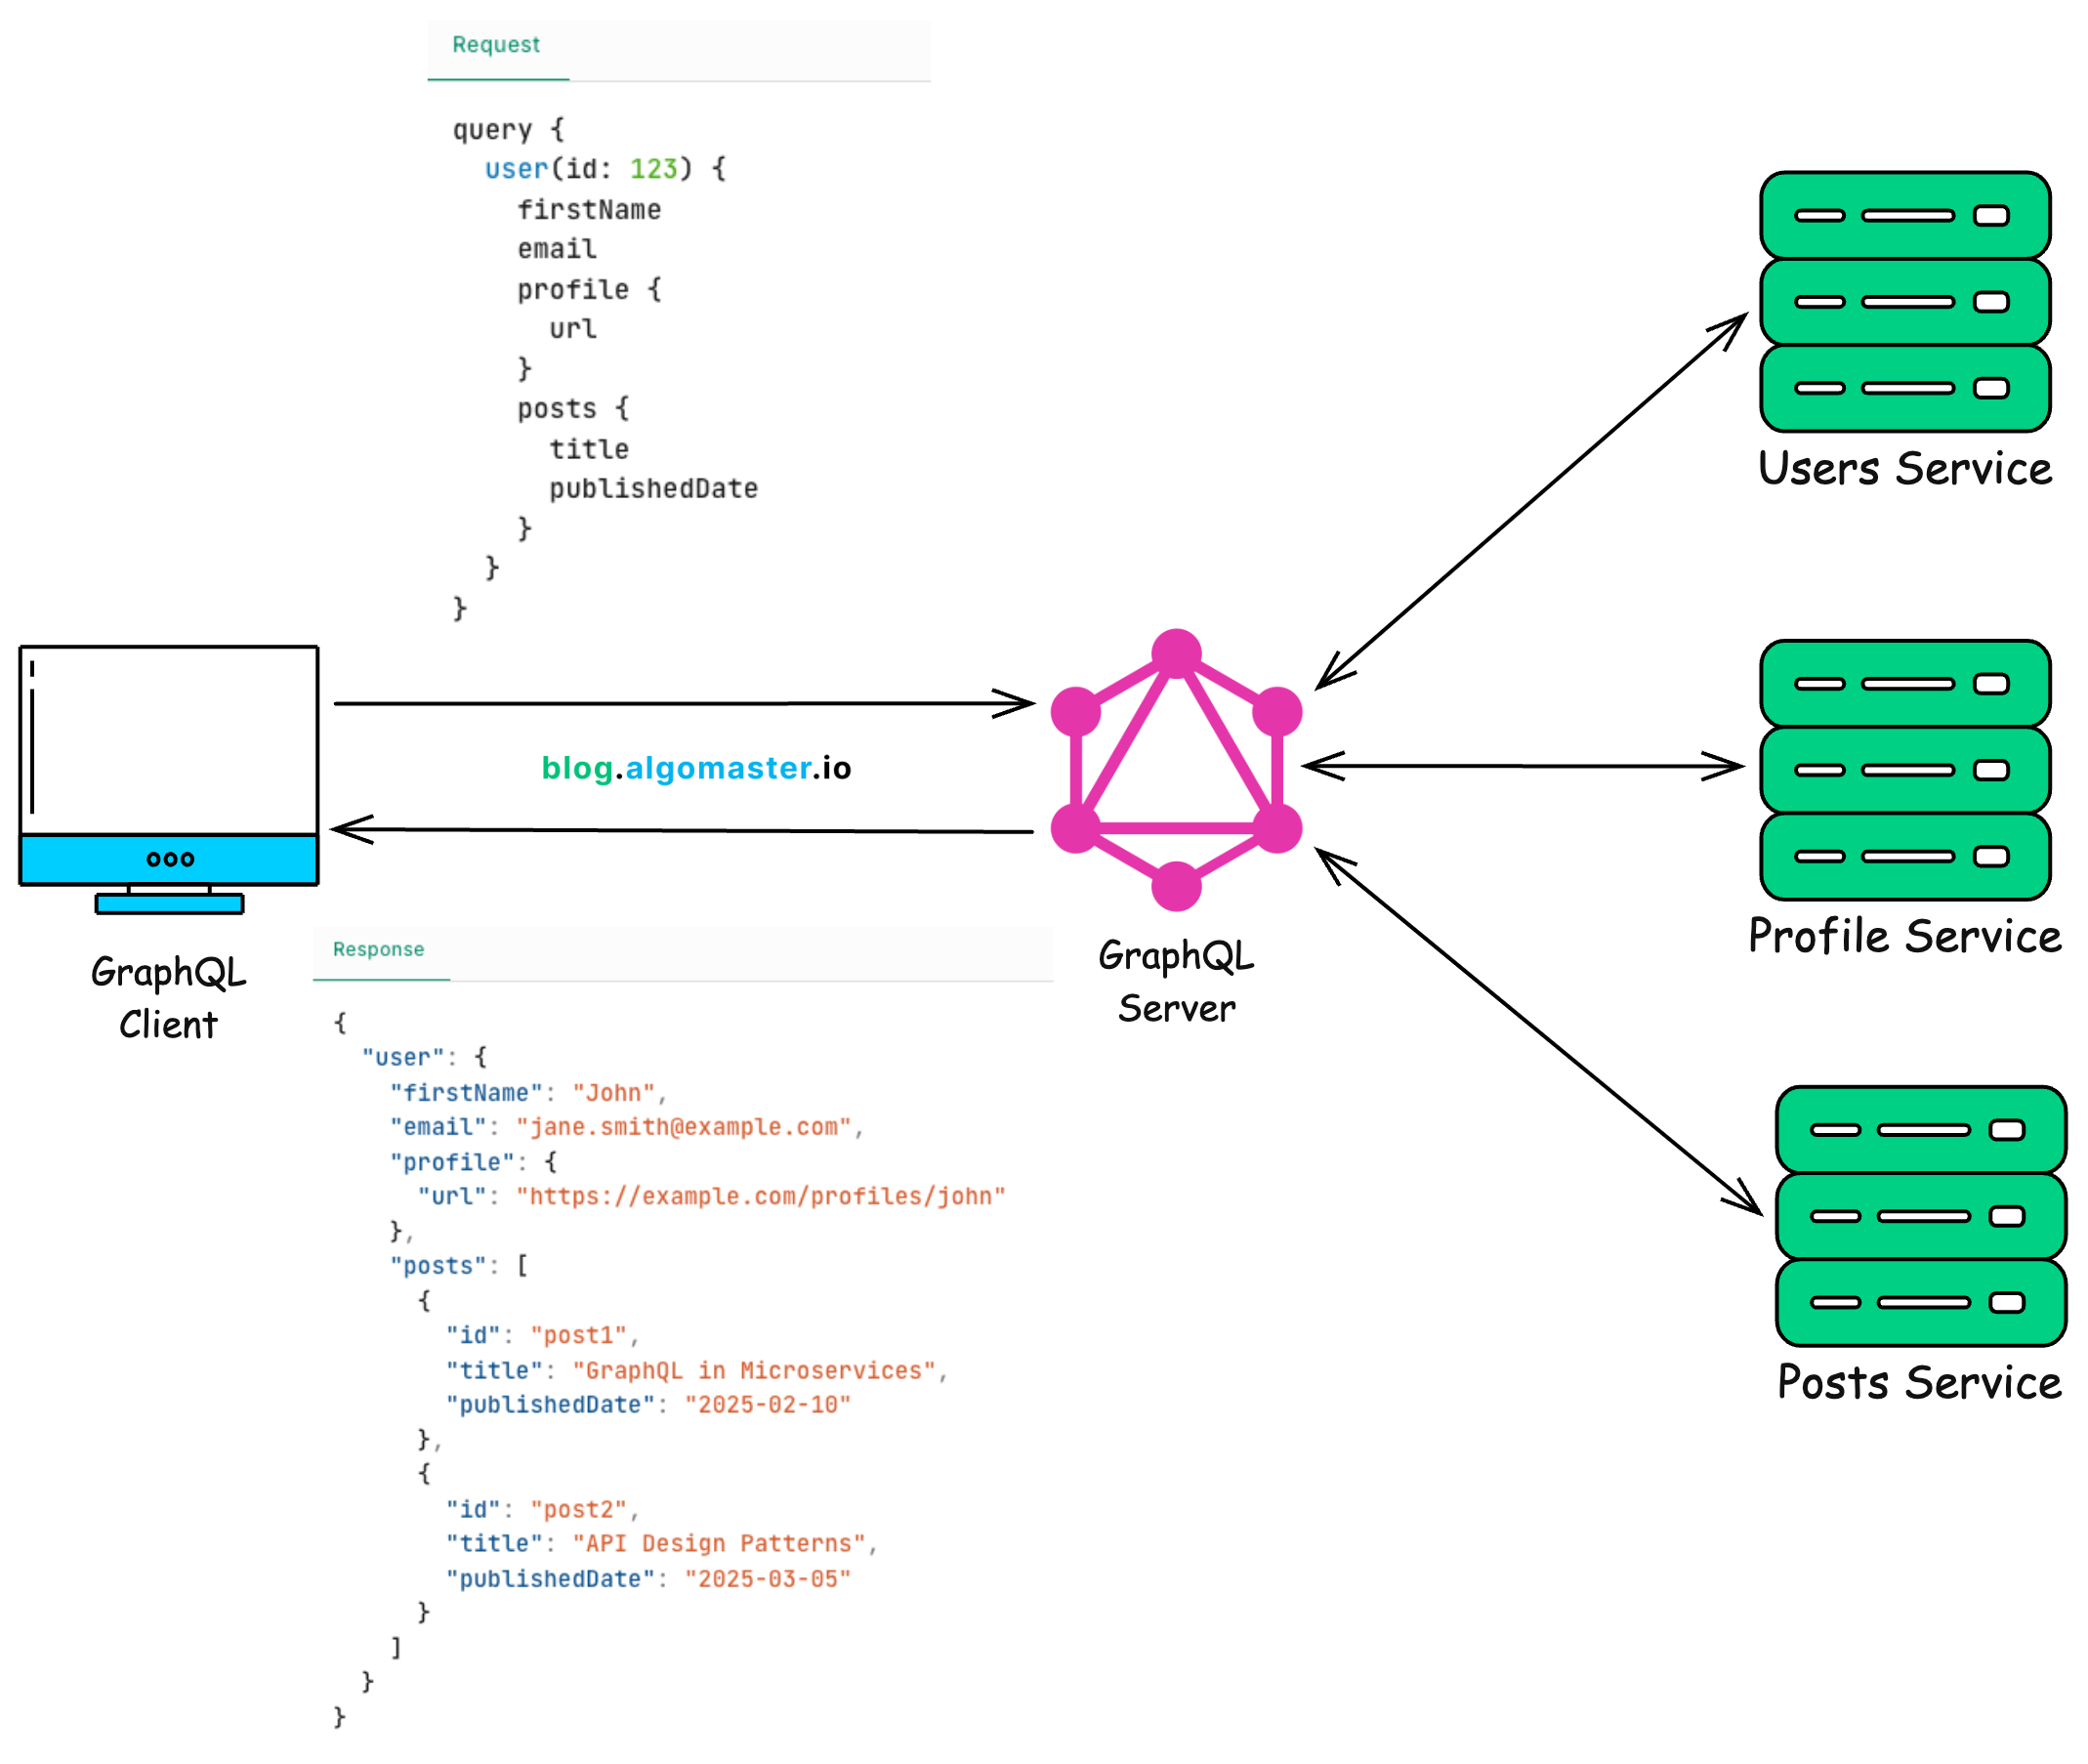

In [14]:
display(Image(filename='Utils/10.png'))

1. With a REST API, if you need a user details, user profile details along with their recent posts, you might have to make multiple requests to different endpoints:

    1. GET /api/users/123 → fetch user details

    2. GET /api/users/123/profile → fetch user profile
    
    3. GET /api/users/123/posts → fetch user’s posts

2. With GraphQL, you can combine those requests into one and fetch exactly the data you need in a single query as shown in diagram.

3. Also the server responds with only the requested fields, reducing unnecessary data transfer and improving efficiency.


But ...

1. GraphQL also comes with trade-offs—it requires more processing on the server side and isn’t as easy to cache as REST.


When a client makes a request, they usually want to store or retrieve data.

But question ?? arises , where is the actual data stored?


# 10. DataBases 

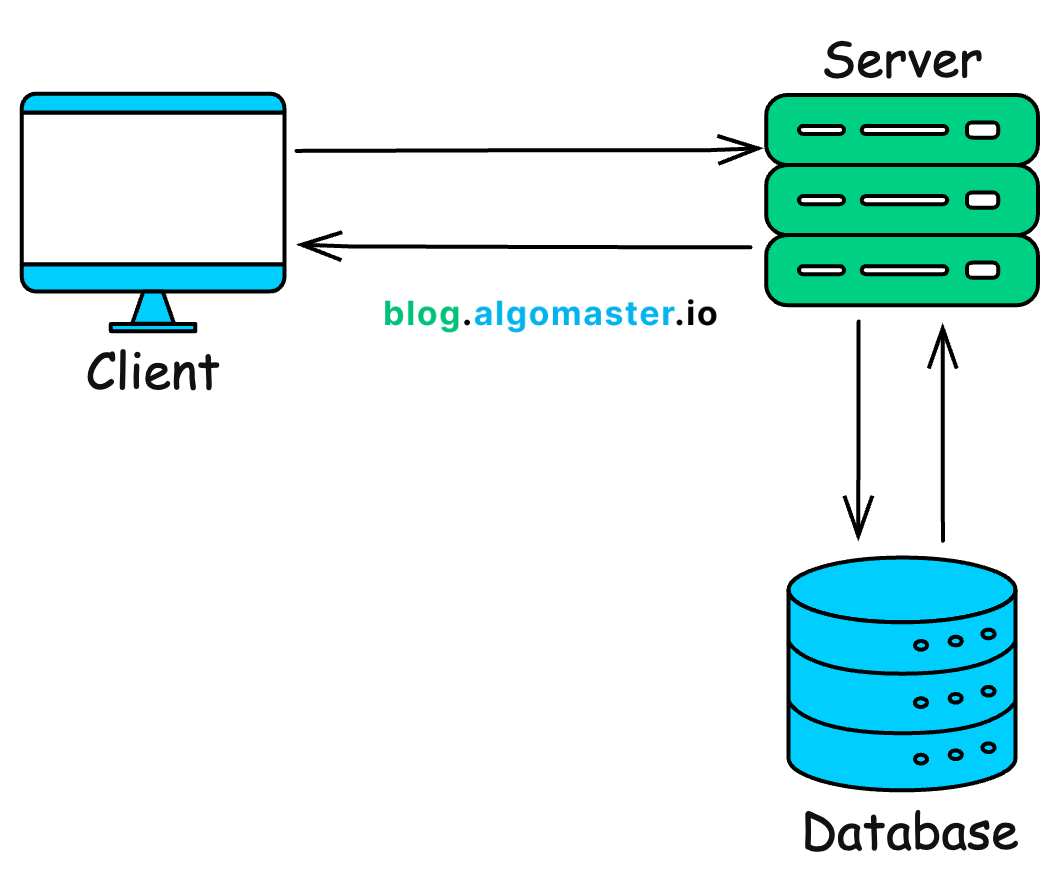

In [17]:
display(Image(filename='Utils/11.png'))

1. If our application deals with small amout of data , we could store it in memory.

2. But modern applications deals with small amount of data , far more than that which memory can efficiently handle.

3. That's why we need a dedicated server for smooth handling and managing data.

4. A database is the backbone of any server , It ensures that data is stored , recieved , 
and managed efficiently while keeping it secure , **consistent and durable**.

5. When a client requests to store or recieve the data , the server communicated with database , fetches the reqd information and return it to client.

6. Different applications have different **scalability, performance, and consistency** requirements, which is choosing the right type of database is important.



# 11. SQL and NoSQL

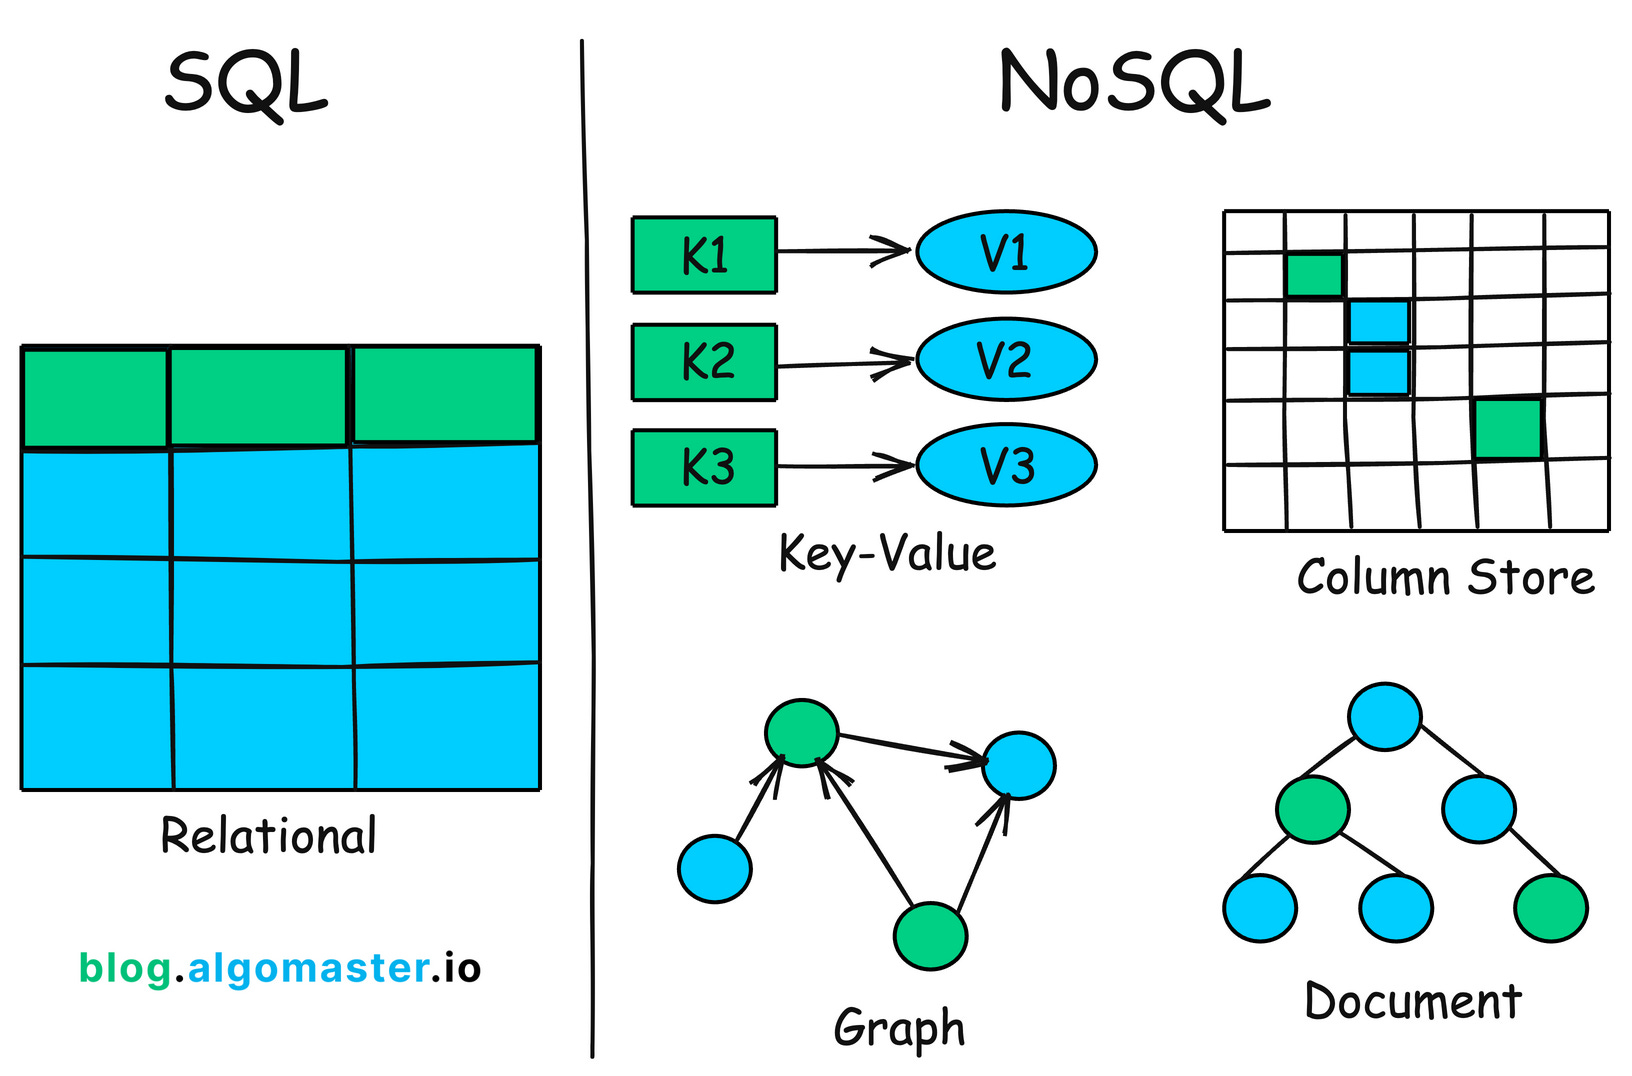

In [16]:
display(Image(filename='Utils/12.jpg'))

**SQL** database stores data in strict predefined schema , and follow the ACID properties.

1. **Atomicity** : A transaction is all or nothing (either it completes or not at all)

2. **Consistency** : Data always remain valid and follow defined rules. (sql uses contrains like primary key)

3. **Isolation** : Transactions does not interfer with one another.

4. **Durability** : Once data is saved , it won't be lost even if system crashes. (sql writes all operations to a transaction log)


That's why SQL databases are ideal for applications that require **strong consistency and structured relationships**, such as banking systems.Examples of popular SQL databases include: MySQL and PostgreSQL.



**NoSQL** databases on the other hand are designed for high scalability and performance.

They don't require **fixed schema** and use different models : 

1. **Key-Value Stores** – Fast lookups for simple key-value pairs (e.g., Redis).
   
   Example : 
    ```
    | Key          | Value                         |
    | ------------ | ----------------------------- |
    | `"user:101"` | `"Akash"`                     |
    | `"user:102"` | `"John"`                      |
    | `"cart:101"` | `["apple", "banana", "milk"]` |

    ```

2. **Document Stores** – Store flexible, JSON-like documents (e.g., MongoDB).

   Example : 

    ```
    {
    "_id": 101,
    "name": "Akash",
    "age": 25,
    "skills": ["Python", "FastAPI"],
    "address": {
        "city": "Delhi",
        "zip": 110001
      }
    }
    ```

3. **Graph Databases** – Best for highly connected data (e.g., Neo4j).

   Example : 

        ```
        Nodes:
        (User: Akash)
        (User: John)
        (Course: System Design)

        Relationships:
        (Akash) -[:FRIEND_WITH]-> (John)
        (Akash) -[:ENROLLED_IN]-> (System Design)
        ```

        ```
        (Akash) --FRIEND_WITH--> (John)
        |
        +--ENROLLED_IN--> (System Design)
        ```

4. **Wide-Column Stores** – Optimized for large-scale, distributed data (e.g., Cassandra).

        Example : Wide-Column Store Example (Cassandra-style)

            | user_id | date       | logins      | clicks      | purchases   |
            | ------- | ---------- | ----------- | ----------- | ----------- |
            | 101     | 2025-10-20 | 3           | 25          | 2           |
            | 101     | 2025-10-21 | 4           | *(missing)* | *(missing)* |
            | 102     | 2025-10-20 | *(missing)* | 12          | *(missing)* |
            | 103     | 2025-10-20 | 5           | 40          | 3           |
        
        Each row stores only the columns it actually has.

        Internally (on disk), Cassandra might store it like this:

        ```
        Partition: user_id = 101
        Column: 2025-10-20:logins     → 3
        Column: 2025-10-20:clicks     → 25
        Column: 2025-10-20:purchases  → 2
        Column: 2025-10-21:logins     → 4

        Partition: user_id = 102
        Column: 2025-10-20:clicks     → 12

        Partition: user_id = 103
        Column: 2025-10-20:logins     → 5
        Column: 2025-10-20:clicks     → 40
        Column: 2025-10-20:purchases  → 3
        ```

            




Question ?? arises which one we should use ??

1. If you need **structured, relational data with strong consistency** → SQL is a better choice.

2. If you need **high scalability, flexible schemas, or fast reads/writes at scale** → NoSQL is a better choice.

3. Many modern applications use both SQL and NoSQL together.
   For example, an e-commerce platform might:
   
   1. Store customer orders in SQL (because they require strict consistency).
   
   2. Store Product recommendations in NoSQL (because they need flexible and fast lookups).

## 12. Vertical Scaling 

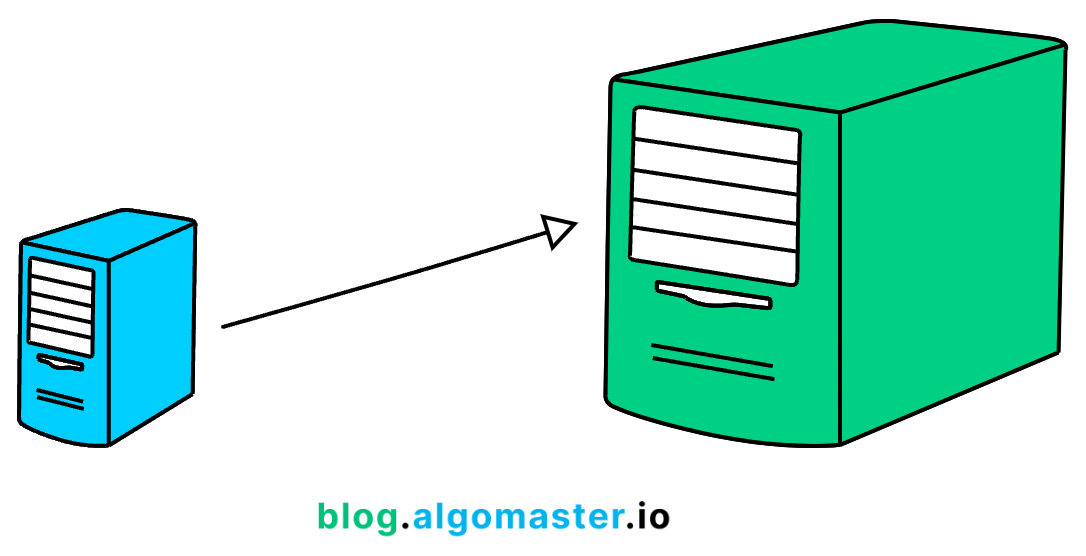

In [19]:
display(Image(filename='Utils/13.png'))

Vertical Scaling (**Scaling Up**)—making a single machine more powerful.

But But... there are some major limitations with this approach:

1. **Hardware limits** → You can’t keep upgrading a server forever. Every machine has a maximum capacity.

   Example : 
   
   1. Each bit in the address bus can represent two states: 0 or 1. 
   
   2. So, if a processor has N address lines, it can uniquely address 2^N  memory locations.
   
   3. Each memory address usually represents 1 byte (8 bits). Hence, total addressable  memory in bytes is 2^N bytes.

    | CPU Type                | Address Width | Formula          | Theoretical Max RAM              | Approx Value         |
    | ----------------------- | ------------- | ---------------- | -------------------------------- | -------------------- |
    | **32-bit CPU**          | 32 bits       | ( 2^{32} ) bytes | 4,294,967,296 bytes              | **4 GB**             |
    | **36-bit (PAE in x86)** | 36 bits       | ( 2^{36} ) bytes | 68,719,476,736 bytes             | **64 GB**            |
    | **64-bit CPU**          | 64 bits       | ( 2^{64} ) bytes | 18,446,744,073,709,551,616 bytes | **16 Exabytes (EB)** |


    i.e 
    
    1. 32-bit → 4 GB max

    2. 64-bit → 16 EB theoretical, much less practical  (no OS or motherboard allows that.)

2. **Cost** → More powerful servers become exponentially more expensive.

3. **Single Point of Failure (SPOF)** → if this one server crashes, the entire system goes down.

While vertical scaling is a quick fix, it’s not a long-term solution for handling high traffic and ensuring system reliability.

There is better approach , that makes our system more **scalable and fault tolerant**.

## 13. Horizontal Scaling 

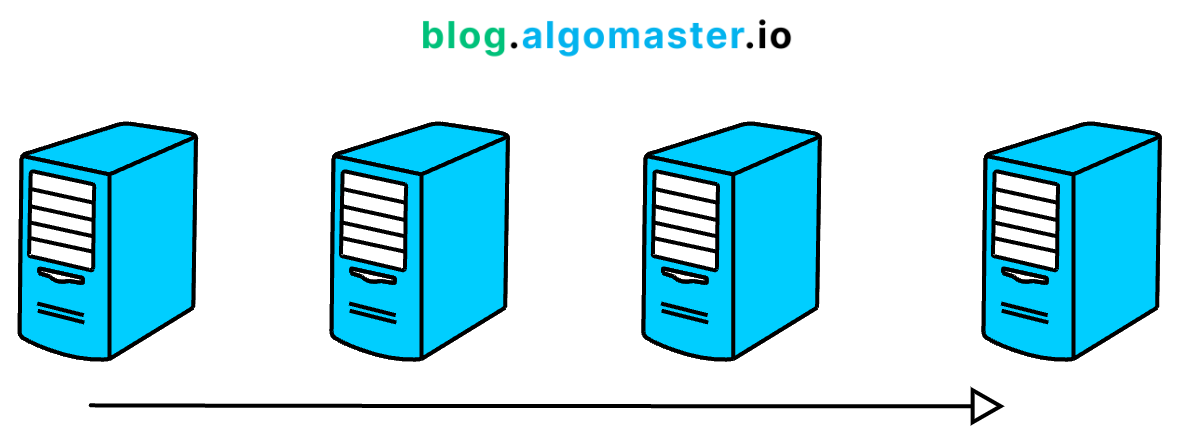

In [20]:
display(Image(filename='Utils/14.png'))

Horizontal Scaling (**Scaling Out**) , where we distribute the workload across multiple machines.

This approach is better because:

1. **More servers** = More capacity → The system can handle increasing traffic more effectively.

2. **No Single Point of Failure** → If one server goes down, others can take over, improving **reliability**.

3. **Cost-effective** → Instead of investing in a single, super-expensive machine, we can use multiple affordable ones.


But But it comes with a new challenge !!!

**How do client know which server to connect to ??..**

## 14. Load Balancers

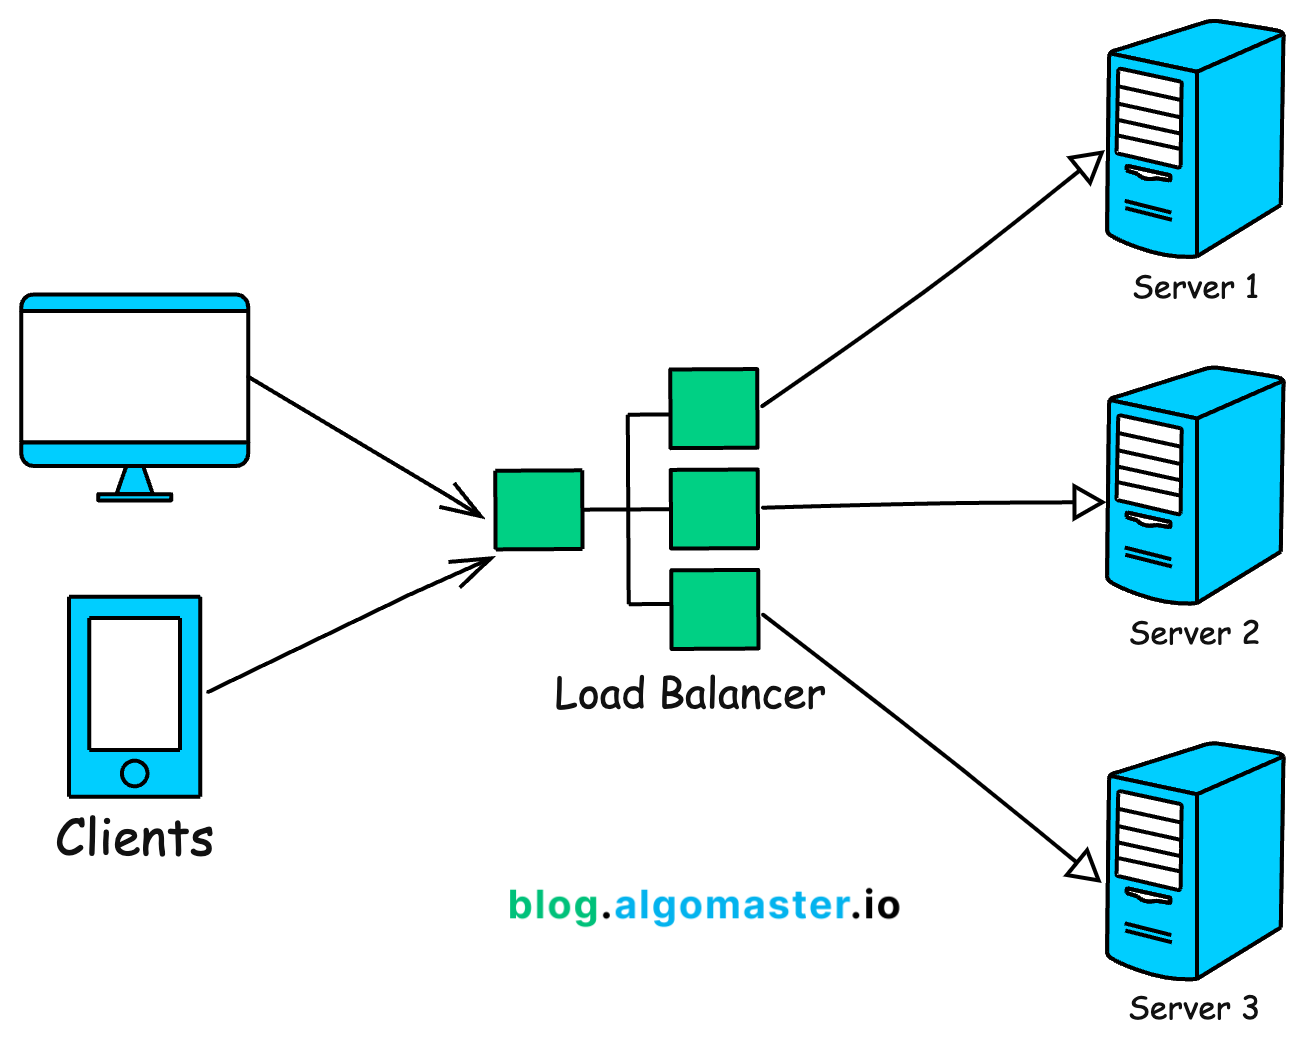

In [21]:
display(Image(filename='Utils/15.png'))

1. A Load Balancer sits between clients and backend servers, acting as a **traffic manager** that distributes requests across multiple servers.

2. If one server crashes, the Load Balancer automatically redirects traffic to another healthy server.


But But question arises ???? 

**How do Load Balancer decide which server should handle the next request?**

It uses Load Balancing algorithms, such as:

1. **Round Robin** → Requests are sent to servers sequentially, one after another in a loop.

2. **Least Connections** → Requests are sent to the server with the fewest active connections (at that moment).

3. **IP Hashing** → 

    1. Requests from the same IP address always go to the same server, which helps with session consistency.

    2. Calculates a hash value from the client’s IP address and uses it to determine the server to route the request.
    
    3. Use it , When you need session persistence, as requests from the same client are always directed to the same server. But sometimes lead to uneven load if some id address get more traffic.

1. Till now we’ve talked about scaling our application servers, but as traffic grows, the **volume of data also increases**.

2. At first, we can scale a **database vertically** by adding more CPU, RAM, and storage, but there’s a **limit to how much a single machine can handle**.

Let's explore other  **Database scaling techniques** help manage large volumes of data efficiently.

## 15. DataBase Indexing 

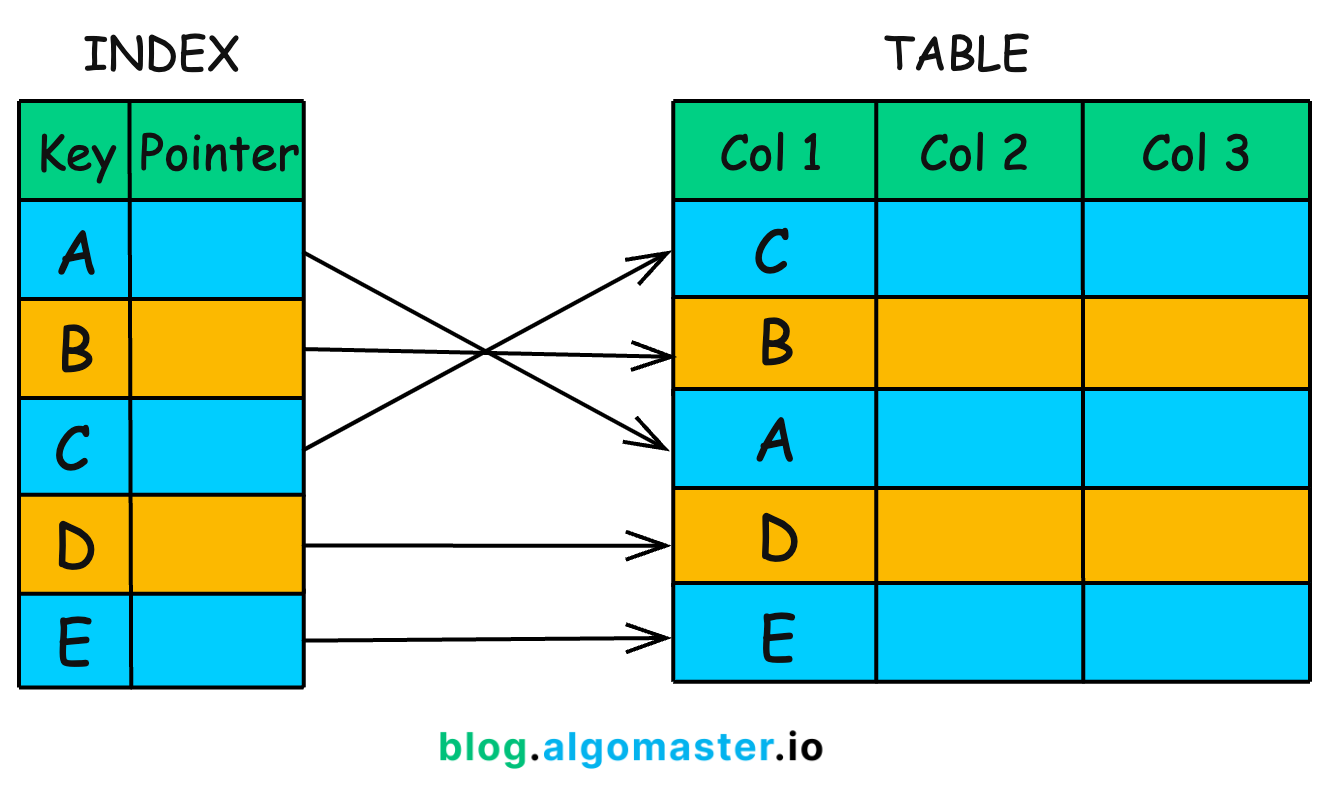

In [4]:
display(Image(filename='Utils/16.png'))

1. To speed up database read queries , one of the quickest and most effective ways is **Indexing**. Example : Think of it like the index page at the back of a book—instead of flipping through every page, you jump directly to the relevant section. A database index works the same way. 

2. It’s is a **super-efficient lookup table** that helps the database quickly locate the required data without scanning the entire table.

How it works ??

1. An index stores **column values along with pointers** to the actual data rows in the table.

2. Indexes are typically created on columns that are frequently queried, such as:

   1. Primary keys
   
   2. Foreign keys
   
   3. Columns used in WHERE conditions

We should only index the most frequently accessed columns.

But But ....

While indexes **speed up reads**, they **slow down writes**(INSERT, UPDATE, DELETE) since the **index needs to be updated** whenever data changes.

`Example : `

| id | name    | age |
| -- | ------- | --- |
| 1  | Alice   | 25  |
| 2  | Bob     | 30  |
| 3  | Charlie | 28  |

Now, you create an index on the age column:

```CREATE INDEX idx_age ON users(age);```

**1. When you READ (SELECT)**

Query:

```SELECT * FROM users WHERE age = 30;```

Database uses the index to find Bob quickly (no need to scan all rows).
➡️ Fast SELECT.

**2. When you INSERT**

You add a new record:

```INSERT INTO users VALUES (4, 'David', 27);```

Now the database must:
1. Add the row to the table.
2. Also insert “27” into the idx_age structure (like a sorted tree).
    
Two writes instead of one → slower insert.


We have seen that Indexing significantly **improves read performance**, but what if even indexing **isn’t enough**, and our database can’t handle the growing number of read requests?

That’s where our next **database scaling technique Replication** comes in.

## 16. Replication

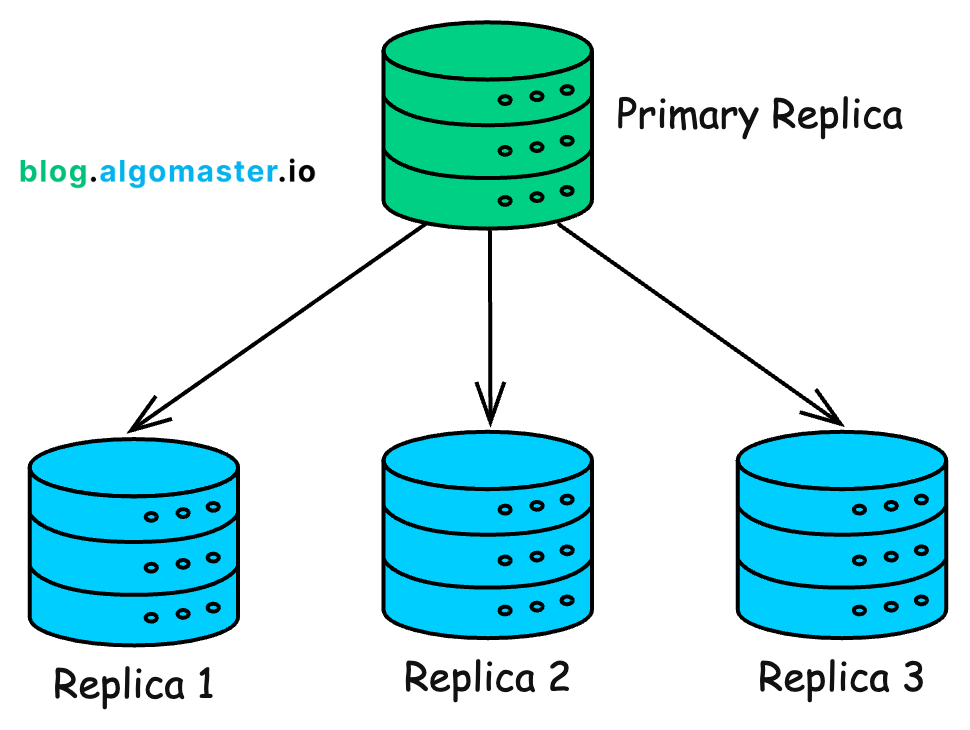

In [6]:
display(Image(filename='Utils/17.png'))

We can scale our database by creating copies of it across multiple servers.


How it works:

1. We have one primary database (also called the Primary Replica) that handles all write operations (INSERT, UPDATE, DELETE).

2. We have multiple read replicas that handle read queries (SELECT).

3. Whenever data is written to the primary database, it gets copied to the read replicas so that they stay in sync.

Note that , replicas also use data indexing technique i.e they also have index table.


1. Replication improves the read performance since read requests are **spread across multiple replicas, reducing the load** on each one.

2. This also improves availability since if the primary replica fails, a read replica can take over as the new primary.

Replication is great for **scaling read heavy** applications, 
But But ...what if we need to **scale writes or store huge amounts of data**?



## 17. Sharding

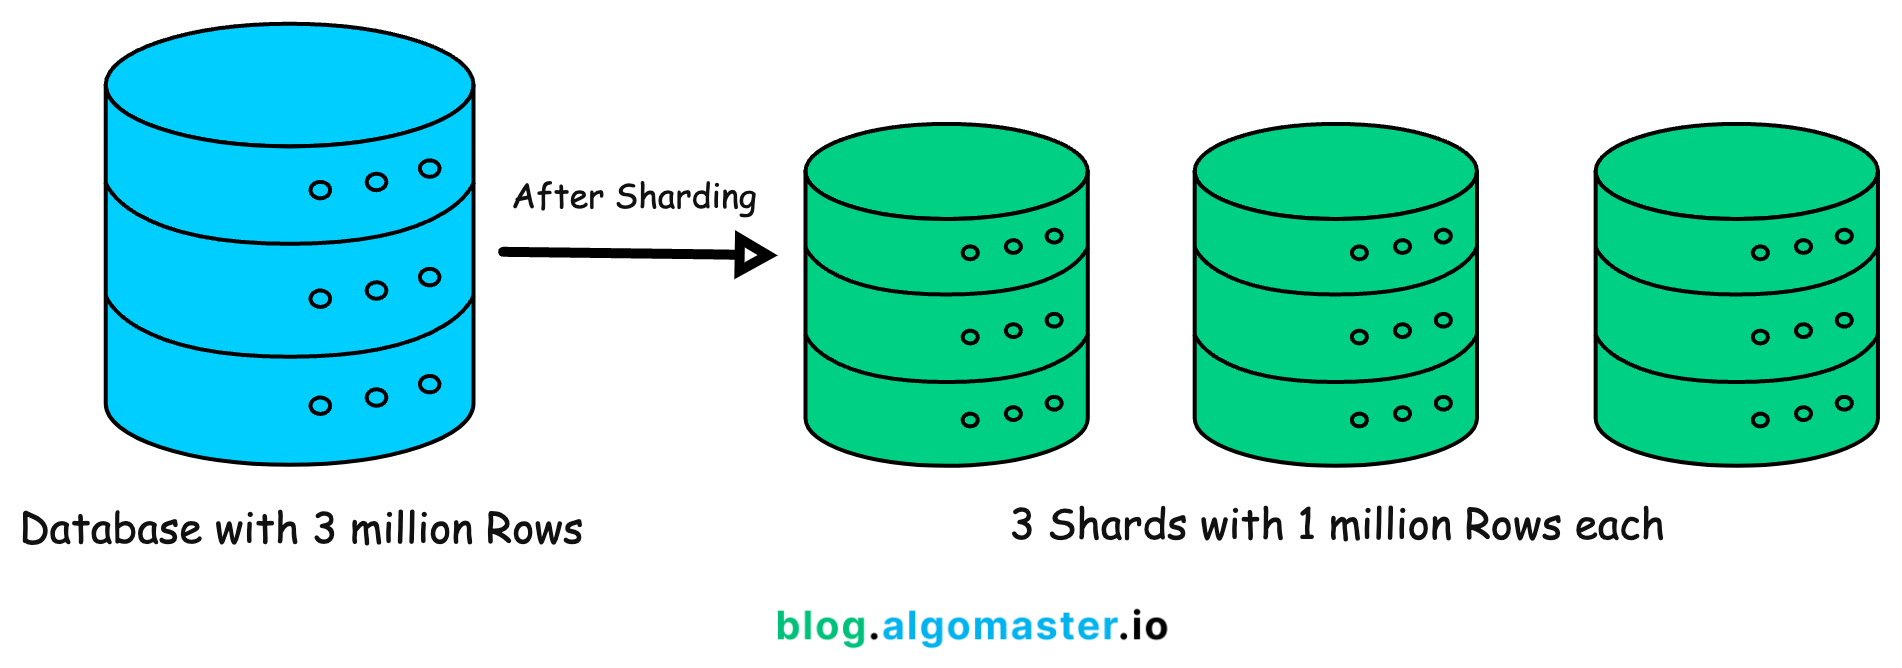

In [7]:
display(Image(filename='Utils/18.png'))

1. If our servcie now has millions of users, and our database has grown to terabytes of data.

2. A single database server will eventually struggle to handle all this data efficiently.

3. Instead of keeping everything in one place, we **split the database into smaller, more manageable pieces** and **distribute them across multiple servers**.

This technique is called **Sharding**.

1. We divide the database into smaller parts called **shards**.

2. Each **shard contains a subset** of the total data.

3. Data is distributed based on a **sharding key (e.g., user ID)**.


By distributing data this way, we:

1. **Reduce database load** → Each shard handles only a portion of queries.

2. **Speed up read and write performance** → Queries are distributed across multiple shards instead of hitting a single database.

Sharding is also referred to as **horizontal partitioning** since it splits data by rows.

But ... 

**What if the issue isn’t the number of rows, but rather the number of columns?**

## 18. Vertical Partitioning

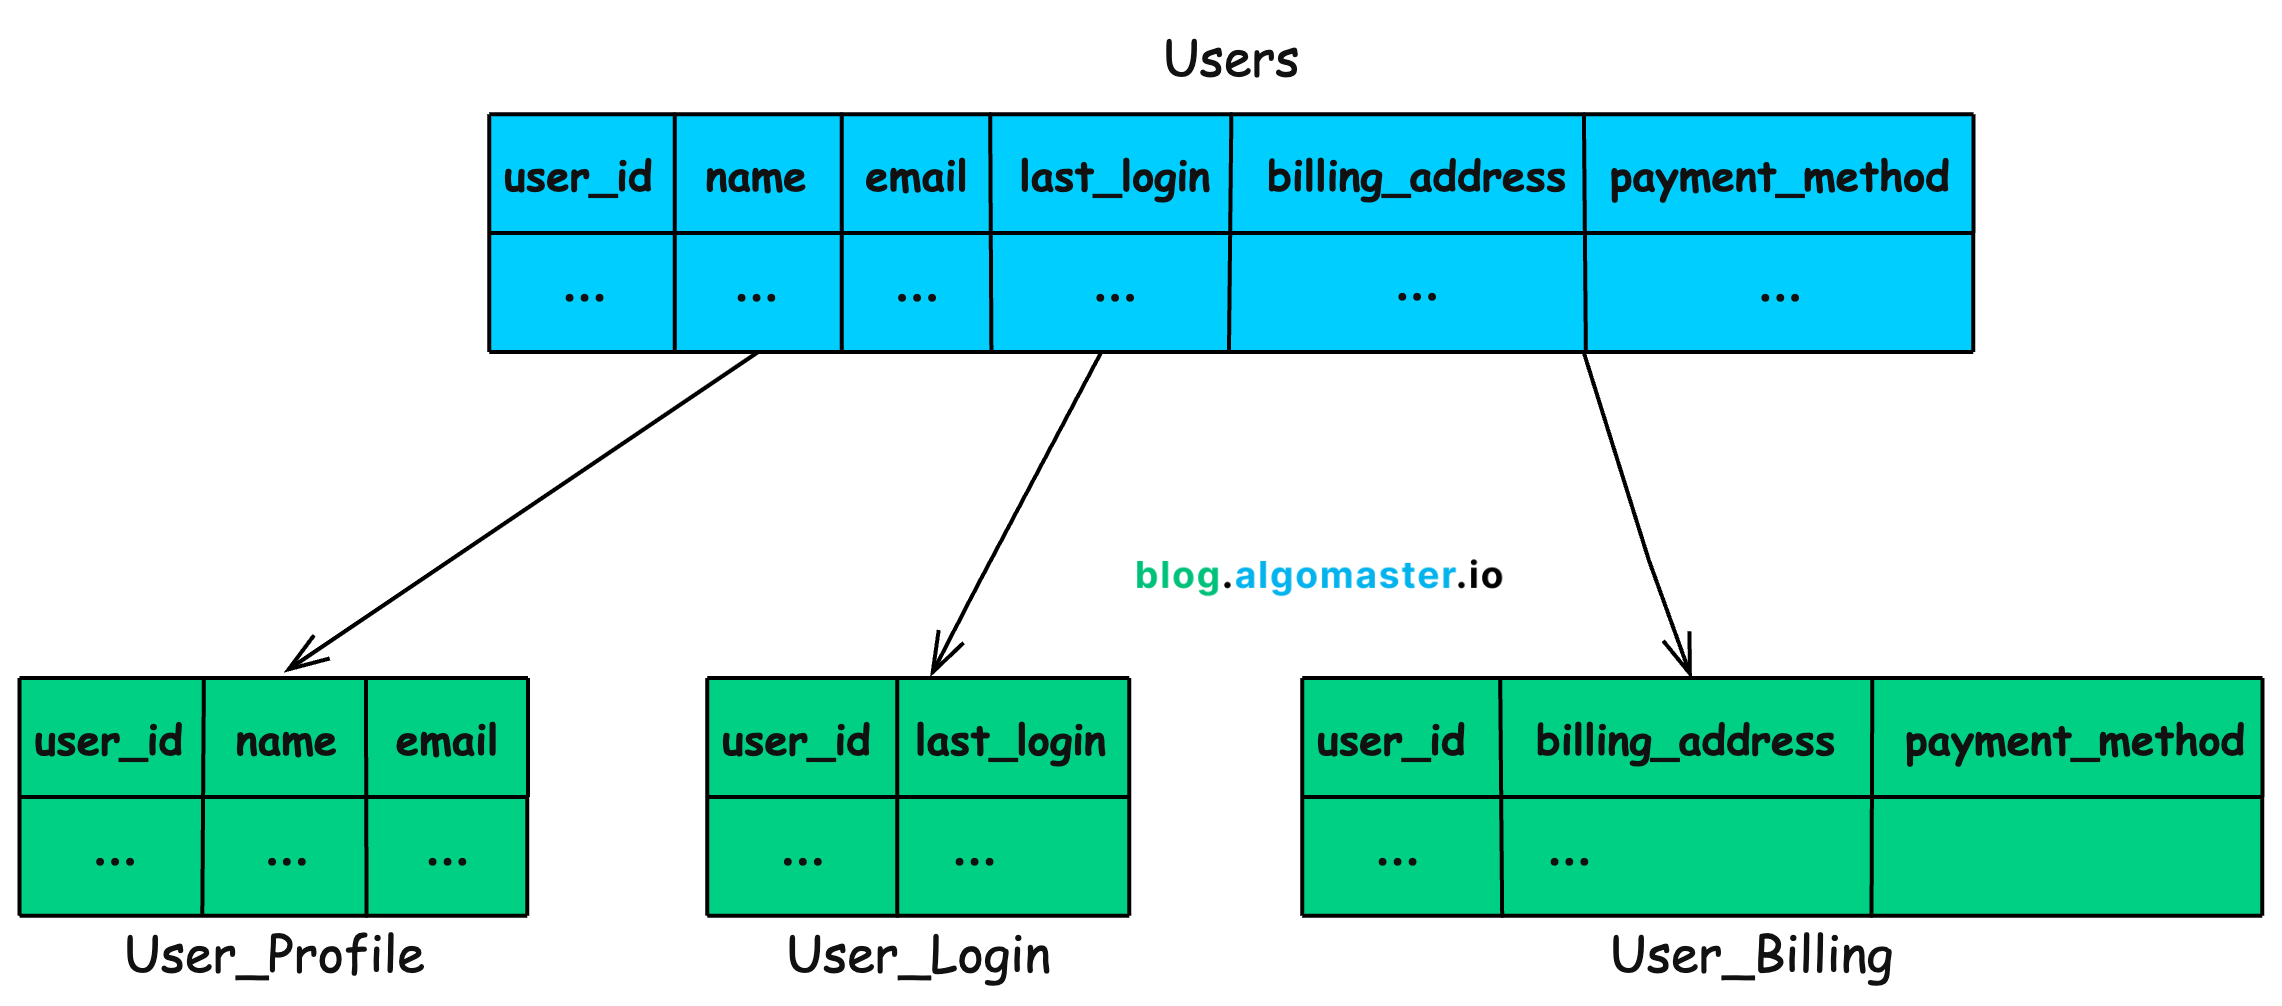

In [12]:
display(Image(filename='Utils/19.png'))

Vertical Partitioning, where we **split the database by columns**.

Imagine we have a User table that stores:

1. Profile details (name, email, profile picture)
2. login history (last_login, IP addresses)
3. billing information (billing address, payment details)

As this table grows, queries become slower because the database must scan many columns even when a request only needs a few specific fields.

To optimize this, we use Vertical Partitioning where we **split user table into smaller, more focused tables** based on usage patterns :

1. User_Profile → Stores name, email, profile picture.
2. User_Login → Stores login timestamps.
3. User_Billing → Stores billing address, payment details.


Benefits : 

1. This improves **query performance** since each request only **scans relevant columns** instead of the entire table.

2. It reduces **unnecessary disk I/O**, making data retrieval quicker.

But But ... , no matter how much we optimize the database, **retrieving data from disk is always slower than retrieving from memory**.

**What if we could store frequently accessed data in memory for lightning-fast access?**

# 19. Caching 

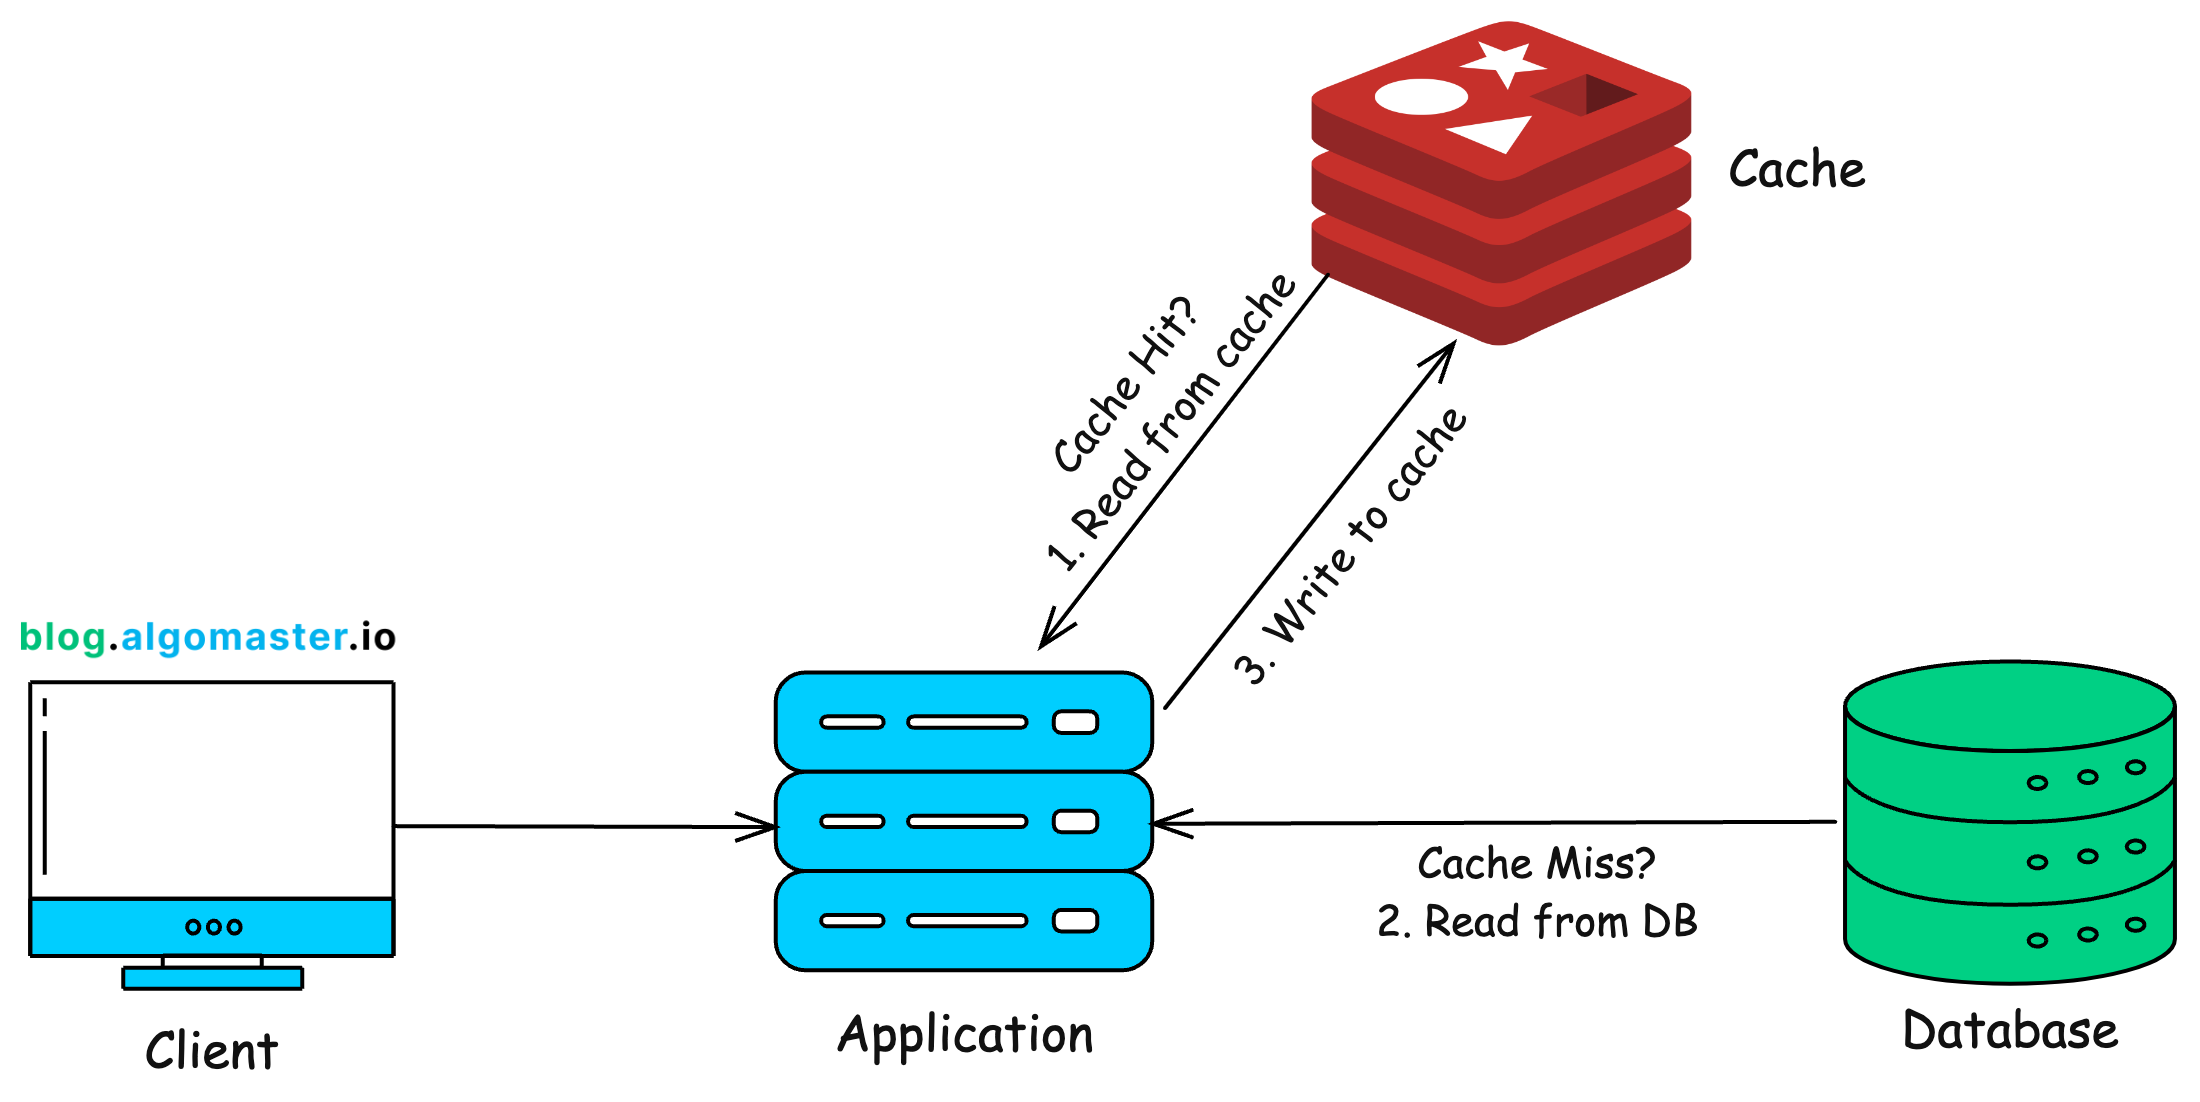

In [14]:
display(Image(filename='Utils/20.png'))

1. Caching is used to optimize the performance of a system by storing frequently accessed data in memory instead of repeatedly fetching it from the database.

2. One of the most common caching strategies is the Cache Aside Pattern.
   How it works: 
    1. When a user requests a data, the application first check the cache.
    2. If the data is in the cache, it’s returned instantly, avoiding a database call.
    3. If the data is not in the cache, the application retrieves it from the database, stores it in the cache for future requests, and returns it to the user.
    4. Next time, the same data is requested, it’s served directly from cache, making the request much faster.

3. To prevent outdated data from being served, we use **Time-to-Live (TTL)—an expiration time** set on cached data so it gets automatically refreshed after a certain period.

4. Some of popular caching tools include Redis and Memcached.

There Are 2 Main Ways to Use Caching Tools

| Type                                   | Description                                                                                                    | Example Tools                                              |
| -------------------------------------- | -------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------- |
| **In-Memory Cache (External Service)** | A **separate caching server** running tools like Redis or Memcached. Your app connects to it over the network. | Redis, Memcached                                           |
| **In-Process Cache (Local Memory)**    | Data stored inside the **same app’s RAM** (faster, but limited).                                               | Python `lru_cache`, Node.js `node-cache`, Java Guava Cache |


Cache Update Patterns


| Pattern                | Description                                                                | Example                                           |
| ---------------------- | -------------------------------------------------------------------------- | ------------------------------------------------- |
| **Cache-aside**        | App first checks cache, if not found, fetches from DB and stores in cache. | Most common                                       |
| **Write-through**      | Data is written to cache and DB at the same time.                          | Ensures cache always up-to-date                   |
| **Write-back**         | Data written to cache first, DB updated later asynchronously.              | Very fast, but risk of data loss if cache crashes |
| **TTL (Time-To-Live)** | Cached entries expire after a set time.                                    | Redis: `ex=3600`                                  |

Where It Runs

| Layer                 | Purpose                                | Example Tools                                |
| --------------------- | -------------------------------------- | -------------------------------------------- |
| **Client-side Cache** | Browser or mobile app stores responses | LocalStorage, Service Worker                 |
| **Application Cache** | App layer caches results of DB/API     | Redis, Memcached                             |
| **Database Cache**    | DB’s own internal cache                | MySQL buffer pool, PostgreSQL shared buffers |
| **CDN Cache**         | Stores static files close to users     | Cloudflare, Akamai, AWS CloudFront           |


# 20. Denormalization

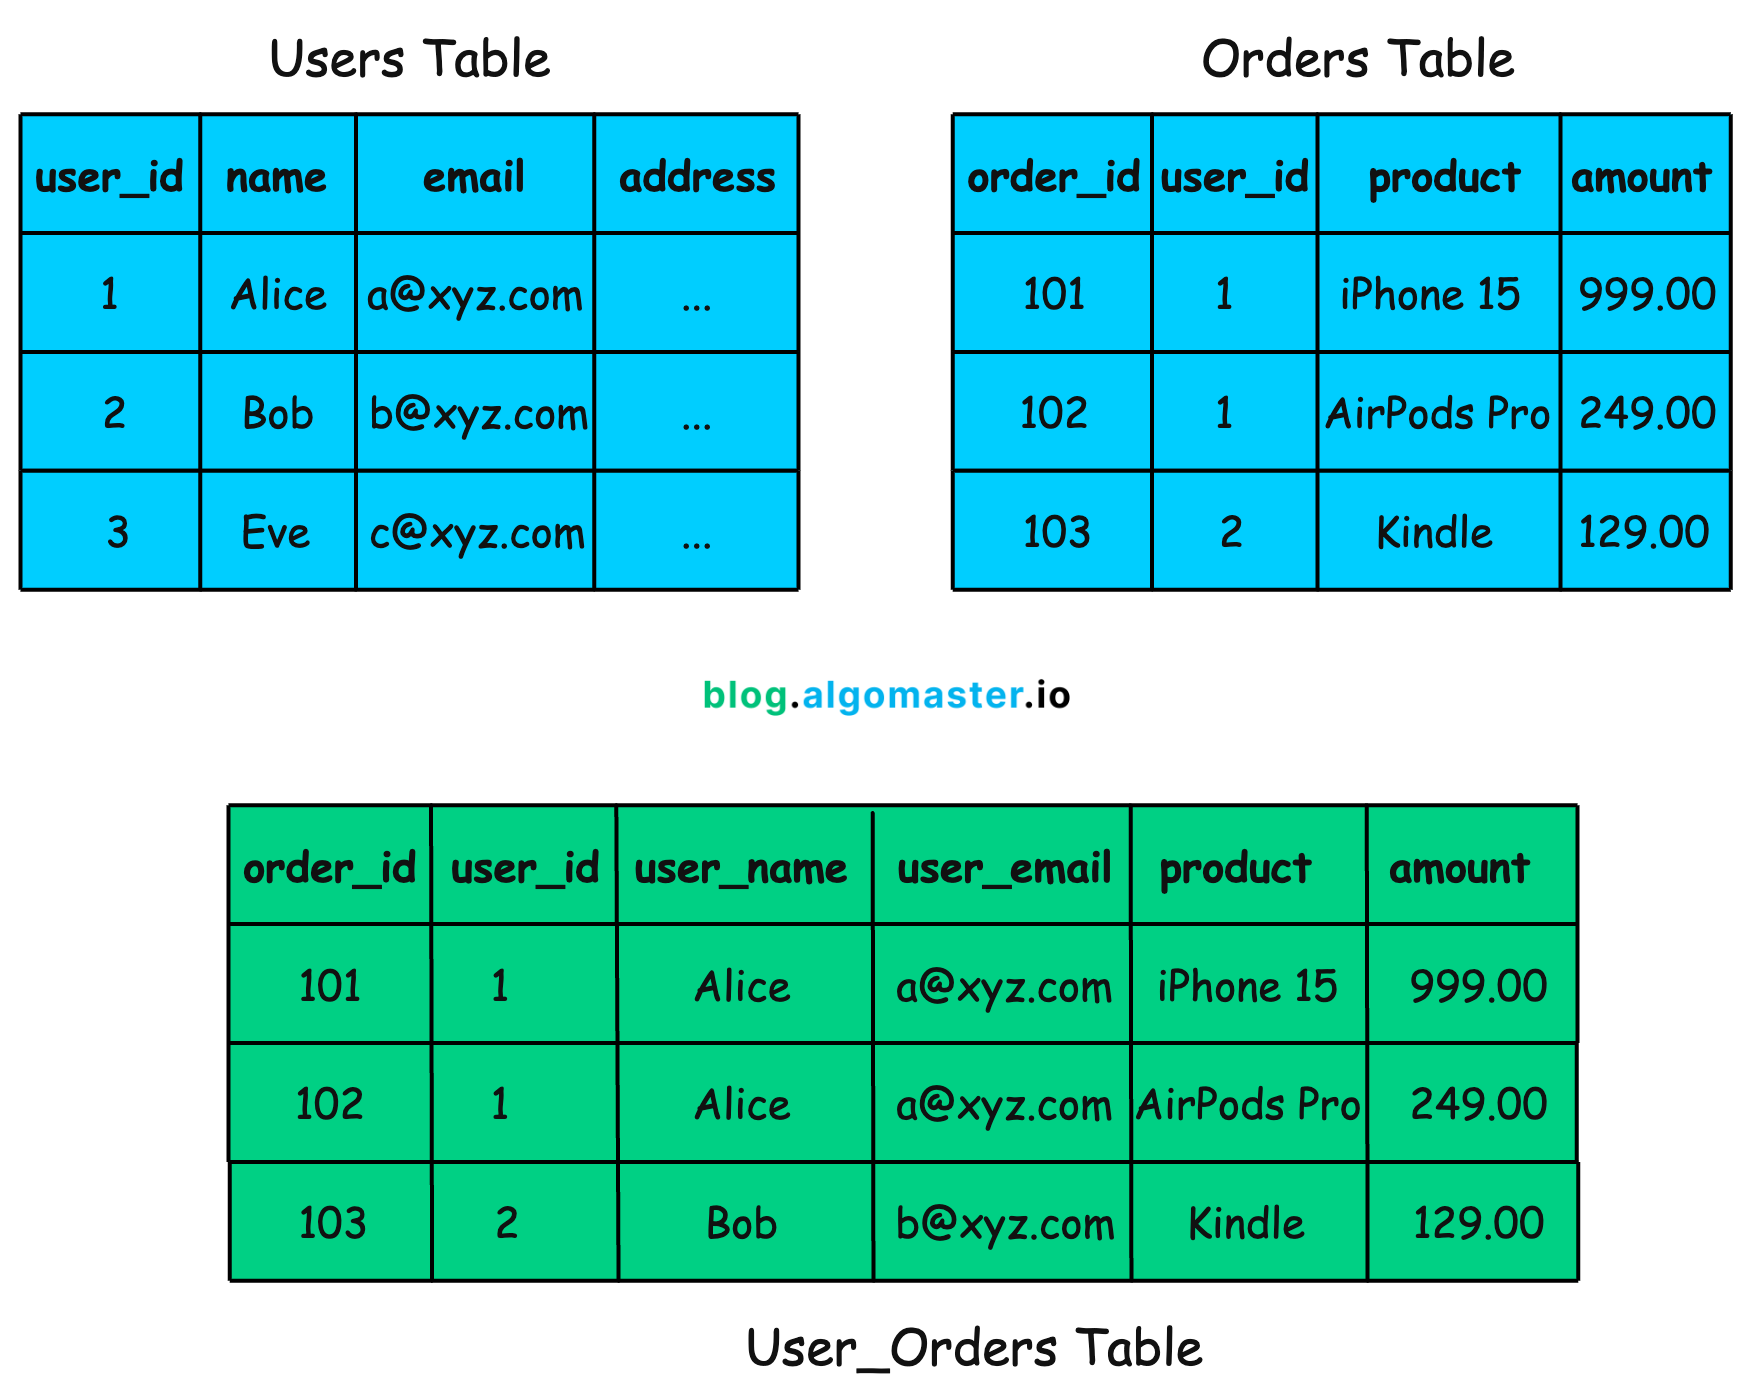

In [15]:
display(Image(filename='Utils/21.png'))

Reason to do this ?

1. Most relational databases use Normalization to store data efficiently by breaking it into separate tables.

2. For example, in an e-commerce system:

    1. The Users table stores user details.
    2. The Orders table stores their orders.
    3. The Products table stores product details.

3. While this reduces redundancy, it also introduces joins. When retrieving data from multiple tables, the database must combine them using JOIN operations, which can slow down queries as the dataset grows.

    ```
    SELECT o.order_id, u.name, u.email, o.product, o.amount
    FROM orders o
    JOIN users u ON o.user_id = u.user_id;
    ```

**Denormalization reduces the number of joins by combining related data into a single table, even if it means some data gets duplicated.**

1. Example: Instead of keeping Users and Orders in separate tables, we create UserOrders table that stores user details along with their latest orders.

2. Now, when retrieving a user’s order history, we **don’t need a JOIN operation**—the data is already stored together leading to faster queries and better read performance.

    ```
    SELECT order_id, user_name AS name, user_email AS email, product, amount
    FROM orders;
    ```


**Advantage** : Denormalization is often used in **read-heavy applications** where **speed is more critical** .

**Disadvantage** :  The downside is it leads to **increases storage usage and more complex update requests.**

# 21. CAP Theorem

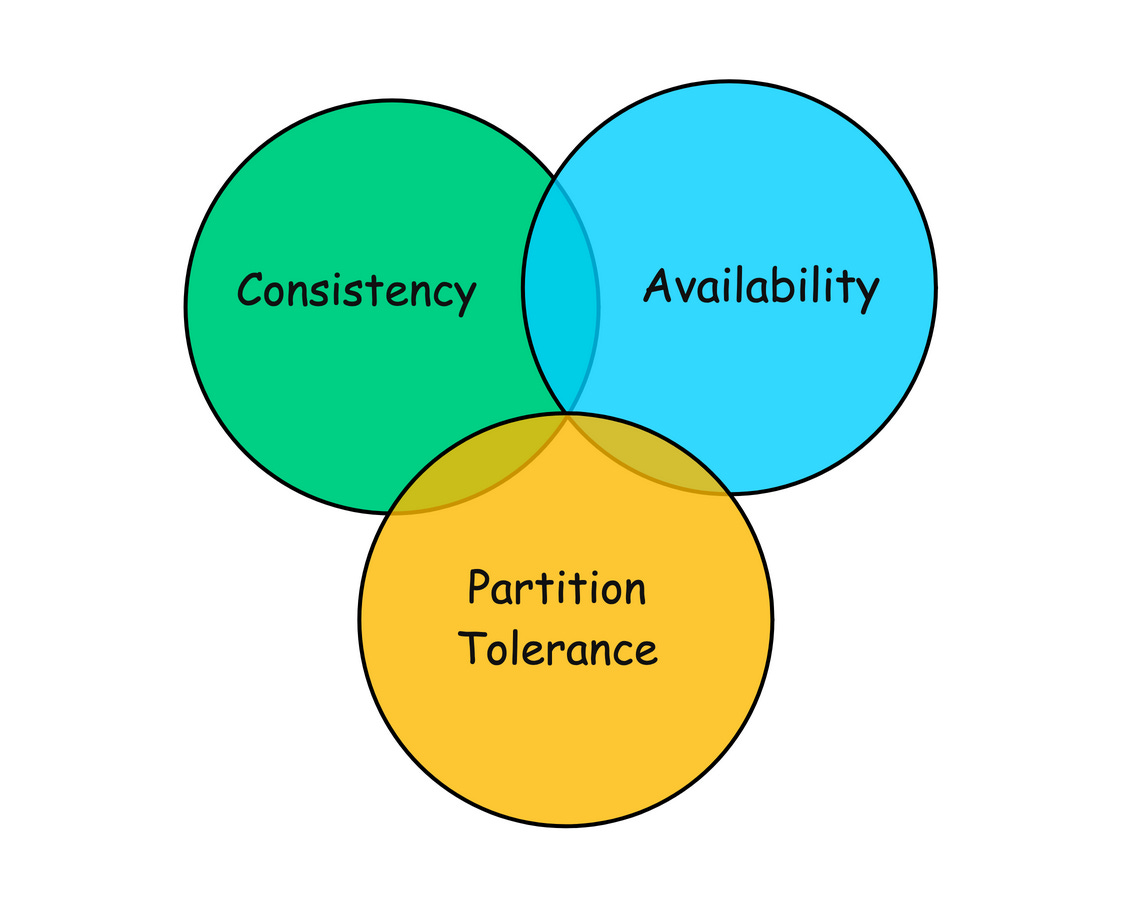

In [17]:
display(Image(filename='Utils/22.jpg'))

**As we scale our system across multiple servers, databases, and data centers, we enter the world of distributed systems.**

One of the fundamental principles of distributed systems is :
  
**CAP Theorem, which states that: No distributed system can achieve all three of the following at the same time:**

1. **Consistency (C)** → Every node always returns the most recent data.
2. **Availability (A)** → The system always responds to requests, even if some nodes are down (but the data may not be the latest).
3. **Partition Tolerance (P)** → The system continues operating even if there’s a network failure between nodes.

# 22. Blob Storage

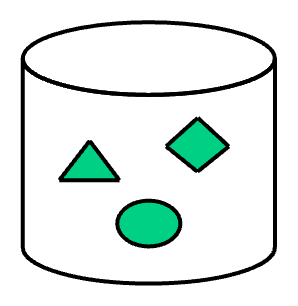

In [19]:
display(Image(filename='Utils/23.png'))

Most modern applications don’t just store text records, they also need to handle images, videos, pdfs and other large files.

**But here’s the problem**: Traditional databases are not designed to store large, unstructured files efficiently.



So, what’s the **solution**?

**We use Blob Storage like Amazon S3—a highly scalable and cost-effective way to store large, unstructured files in the cloud.**

1. Blobs are the individual files like images, videos or documents.

2. These blobs are stored inside logical containers or buckets in the cloud.

3. Each file gets a unique URL, making it easy to retrieve and serve over the web.Example: https://my-bucket-name.s3.amazonaws.com/videos/tutorial.mp4

4. Advantages with using blob storage :
    
    1. Scalability → It can store petabytes of data effortlessly.
    2. Pay-as-you-go pricing → You only pay for storage and retrieval that you actually use.
    3. Automatic replication → Data is copied across multiple data centers and availability zones for durability.
    4. Easy access → Files can be retrieved using REST APIs or direct URLs.

A common use case is to stream audio or video files to user application in real-time.

But streaming directly from blob-storage can be slow, especially if the data is stored in a distant location.

## 23. CDN

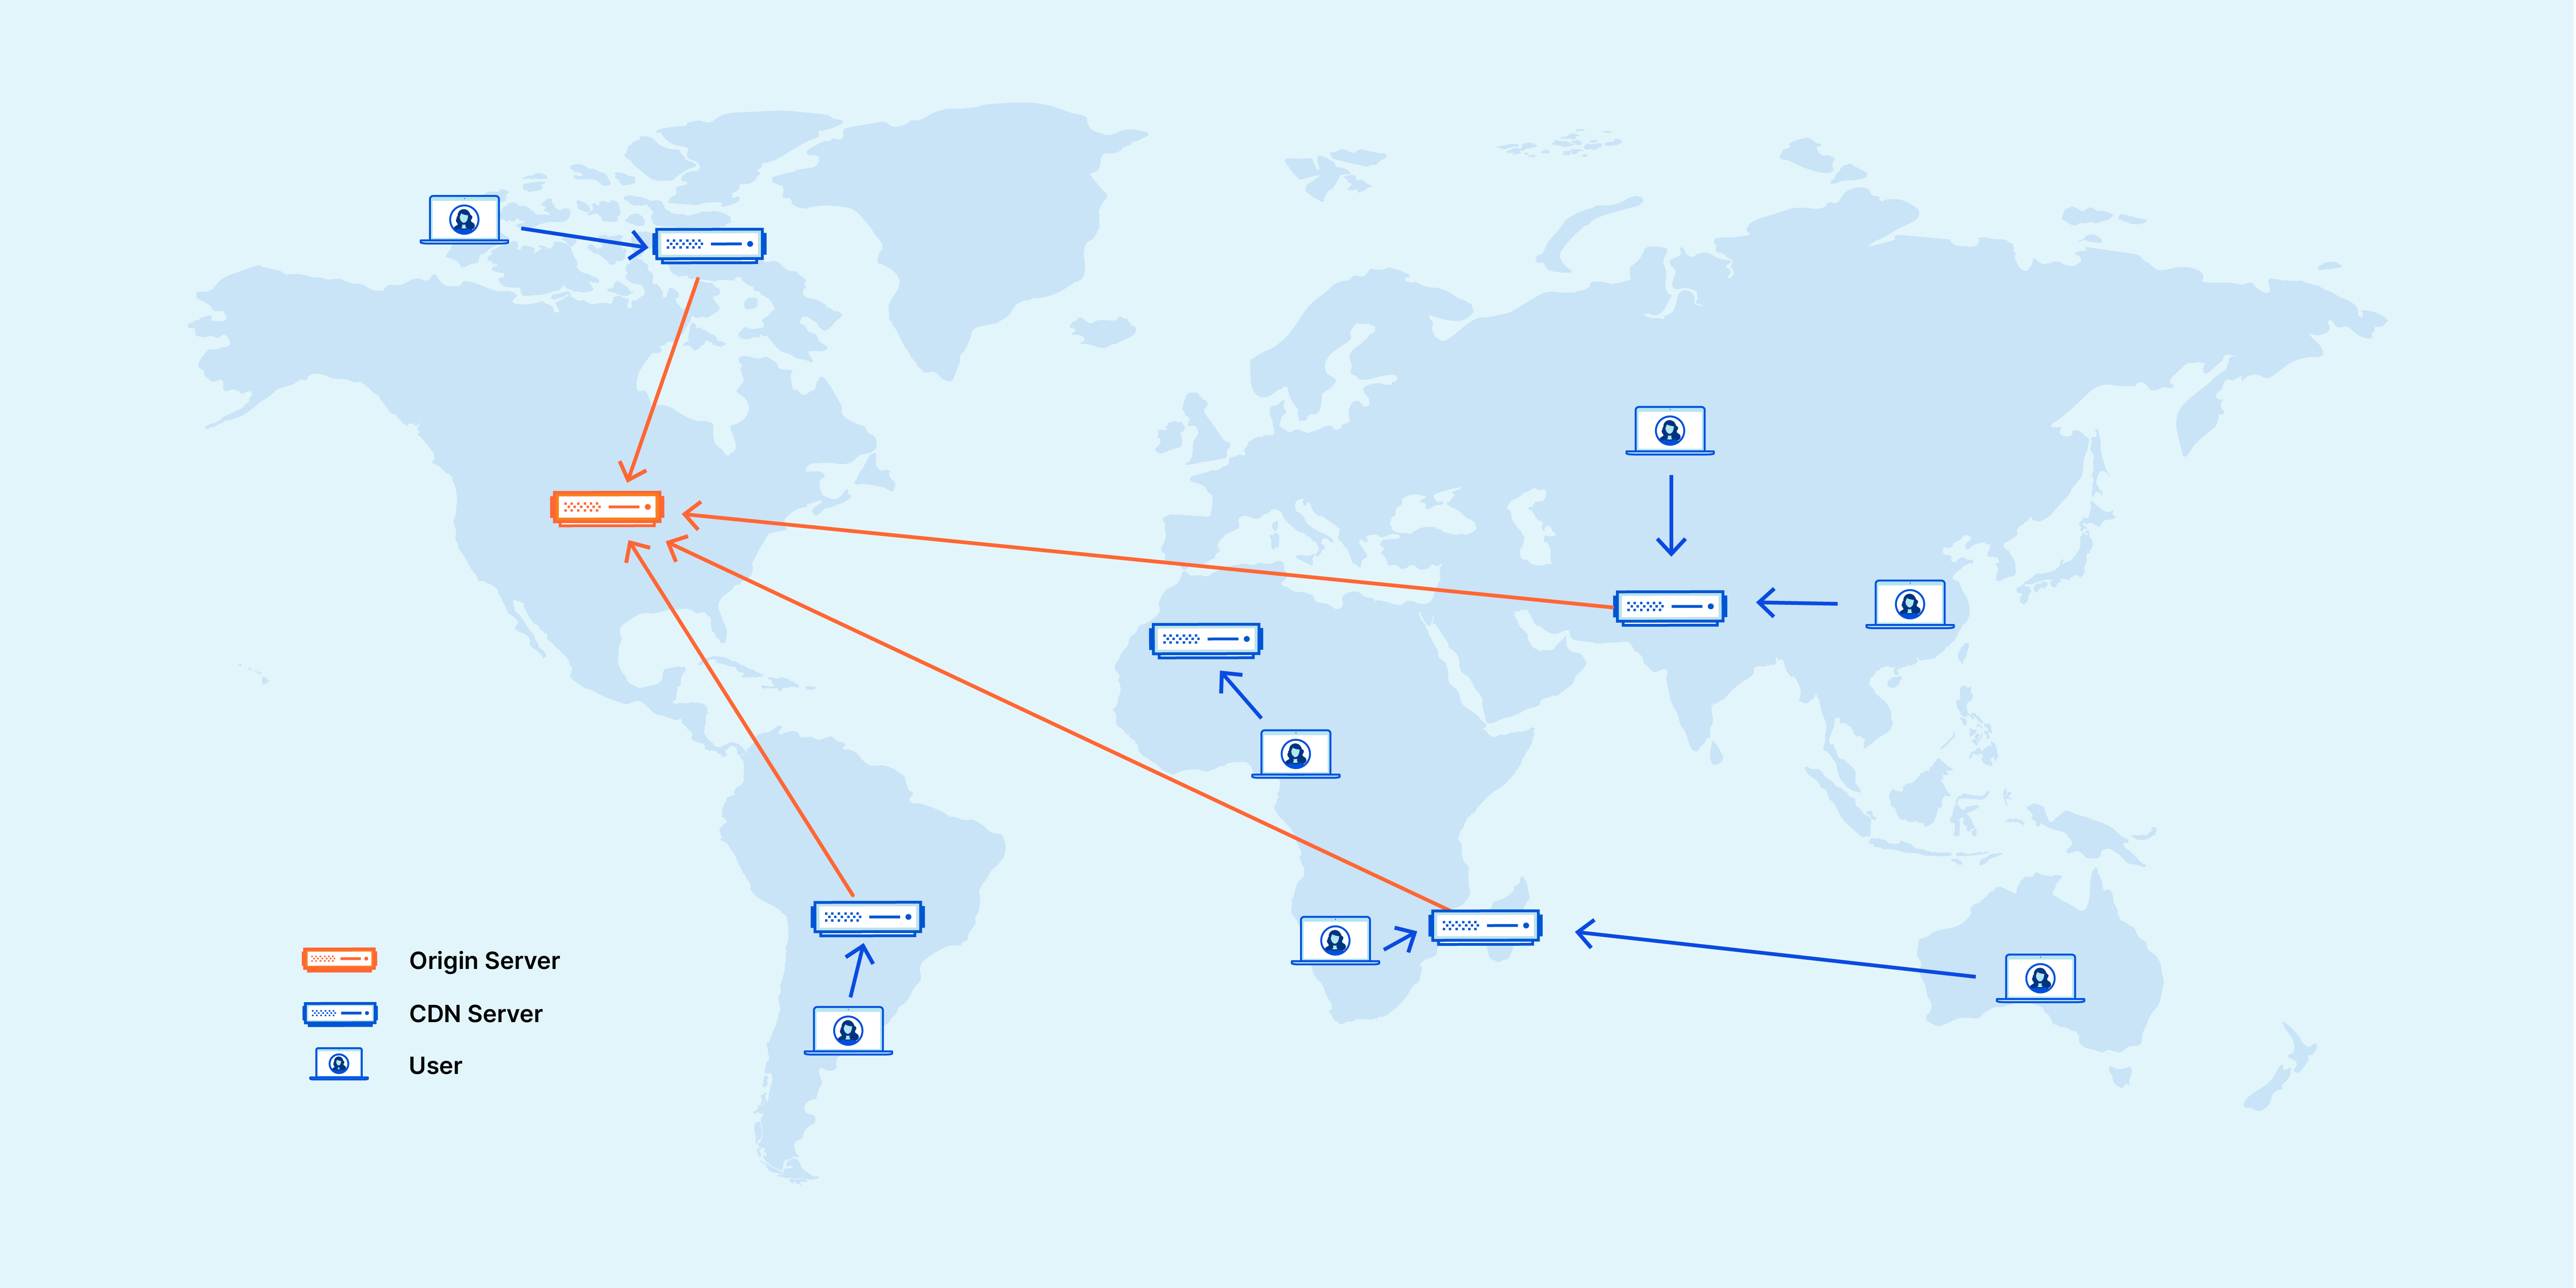

In [21]:
display(Image(filename='Utils/24.png'))

**A CDN (Content Delivery Network) is a global network of distributed servers that work together to deliver web content (like HTML pages, JavaScript files, stylesheets, images, and videos) to users based on their geographic location.**

For example, imagine you’re in India trying to watch a YouTube video that’s hosted on a server in California.

Since the video data has to travel across the world, this **could lead to buffering and slow load times**.

**A Content Delivery Network (or CDN) solves this problem** by delivering content faster to users based on their location.

How ??

1. Instead of serving content from a single data center, a **CDN caches static contents** on multiple edge servers located worldwide.

2. When a user requests content, the **nearest CDN server delivers** it instead of reaching all the way to the origin server.

3. Since content is **served from the closest CDN node**, users experience faster load times with minimal buffering.

A CDN = distributed cache network across the world.Example : Cloudflare

It stores **static copies** (like images, videos, HTML, JS, etc.) closer to users to reduce:

1. **Latency** (faster load time)
2. **Bandwidth cost** (fewer origin requests)
3. **Server load** (origin server isn’t hit every time)


## 24. WebSockets

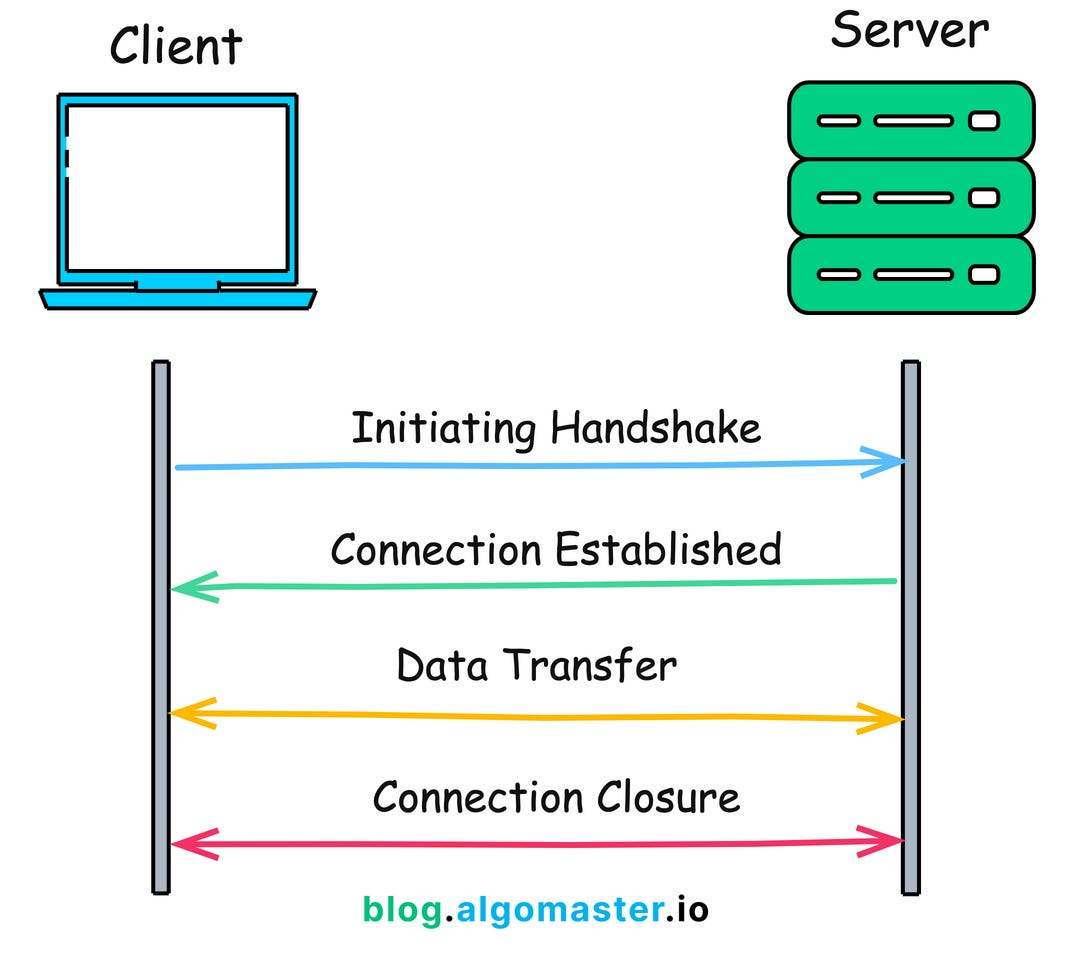

In [23]:
display(Image(filename='Utils/25.jpg'))

1. Most web applications use **HTTP, which follows a request-response model**.

2. The client sends a request.

3. The server processes the request and sends a response.

4. If the client needs new data, it must send another request.

5. This works fine for static web pages but it’s too slow and inefficient for real-time applications like: live chat apps, stock market dashboards and online multiplayer games.

6. With HTTP, the only way to get real-time updates is through **polling—sending** repeated requests every few seconds.

7. But polling is inefficient because it **increases server load and wastes bandwidth**, as most responses are empty (when there’s no new data).

**WebSockets solve this problem by allowing continuous, two-way communication between the client and server over a single persistent connection.**

**How WebSockets work:**

1. The client initiates a WebSocket **connection** with the server.

2. Once established, the connection **remains open**.

3. The server can push updates to the client at any time,**without waiting for a request**.

4. The client can also send messages instantly to the server.

5. This enables real-time interactions and eliminates the need for polling.

## 25. Webhooks

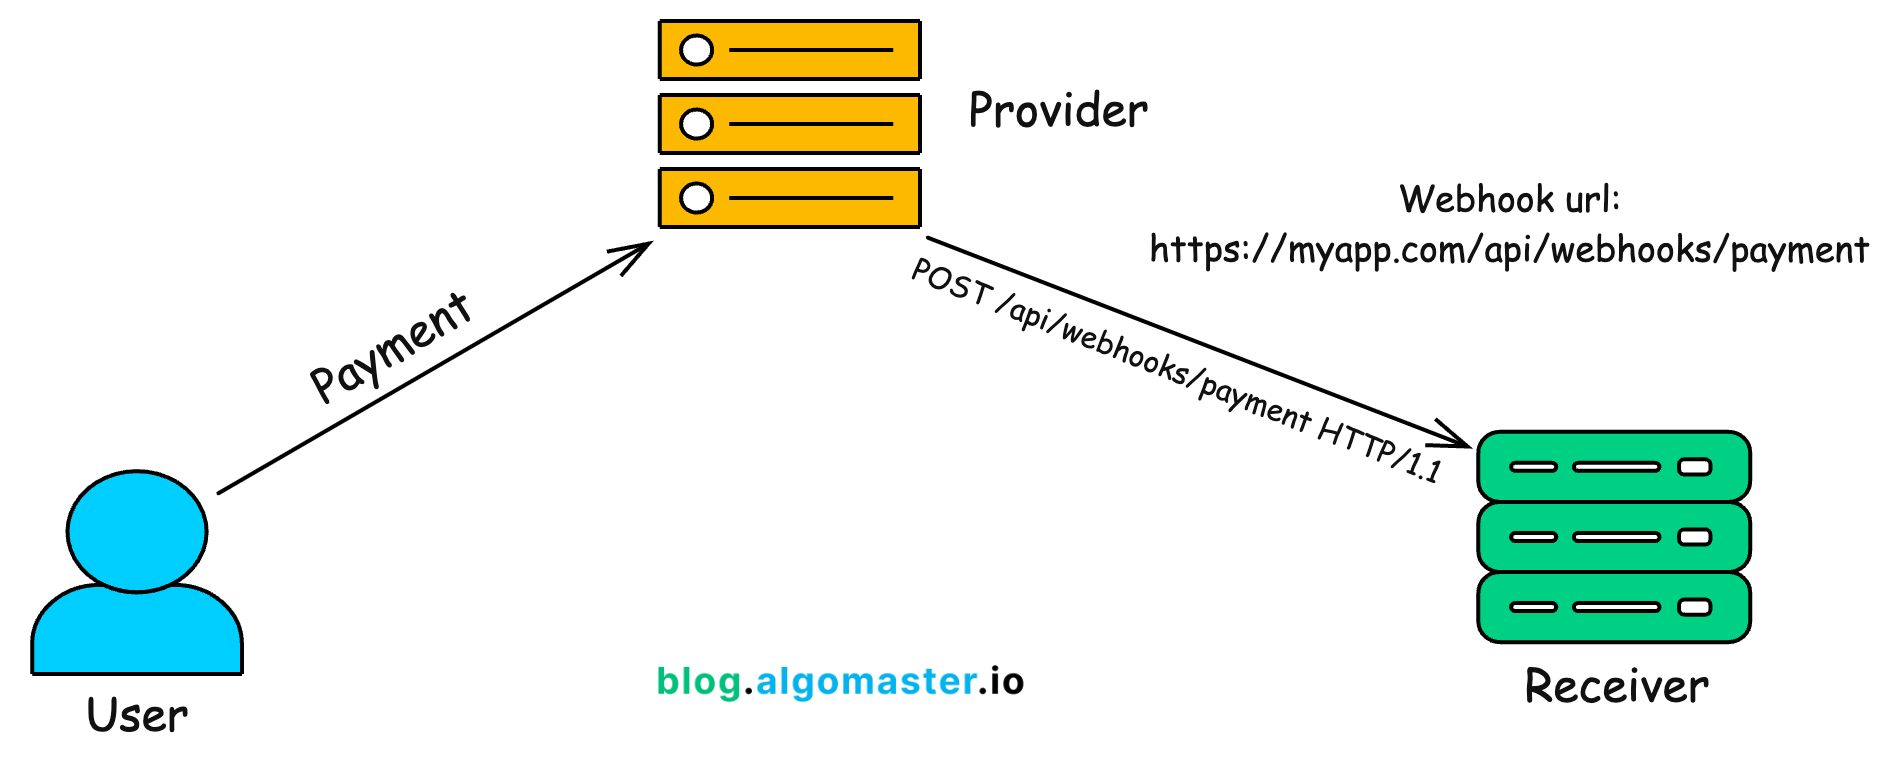

In [26]:
display(Image(filename='Utils/26.png'))

# 26.Microservices

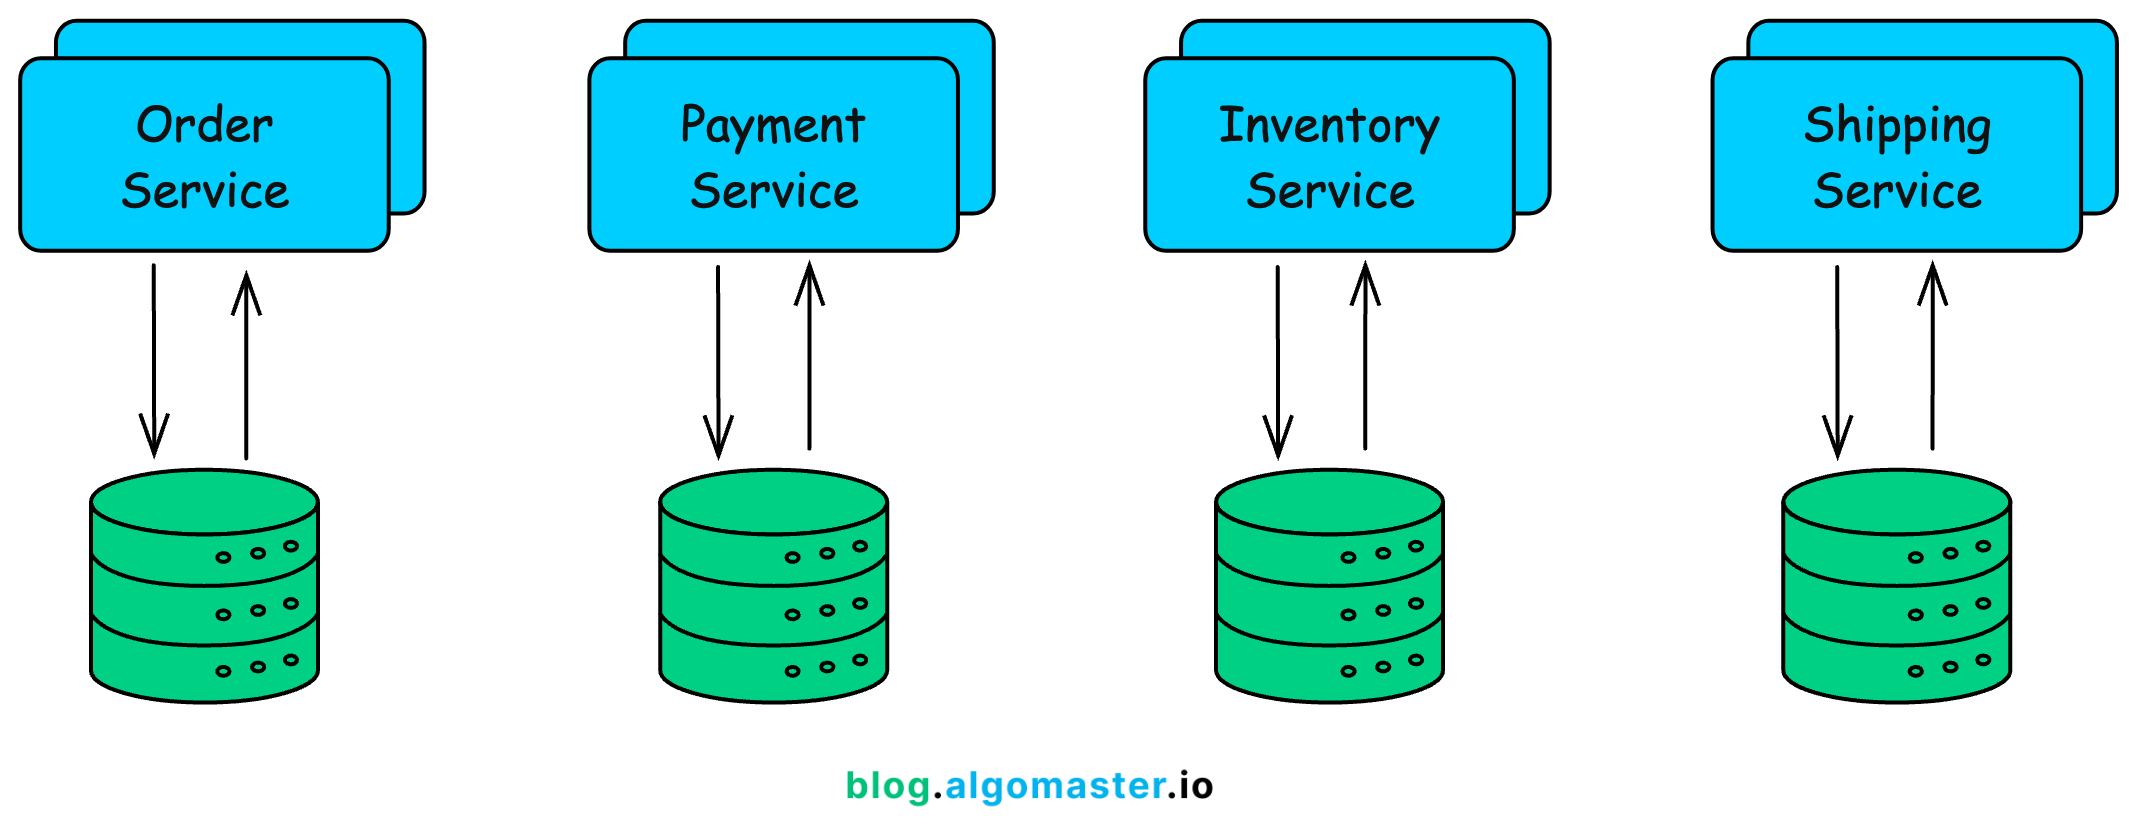

In [27]:
display(Image(filename='Utils/27.png'))

1. Traditionally, applications were built using a **monolithic architecture**, where:

    1. All features (e.g., authentication, payments, orders, shipping) are inside one large codebase.
    
    2. If one part of the system fails or needs scaling, the entire system is affected.

    3. Deployment is risky—one bad update can take down the entire app.Example: Imagine an e-commerce app where the order, payment, inventory, and shipping modules are all tightly connected in a single codebase.If the inventory system crashes, the entire app could go down.

2. Monoliths work fine for small applications, but for large-scale systems, they become hard to manage, scale, and deploy.



**The solution is to break down your application into smaller, independent services called micro-services that work together.**


Each microservice:

1. Handles a single responsibility.
2. Has its **own database and logic**, so it can scale independently.
3. Communicates with other microservices using **APIs or message queues**.

This way services can be scaled and deployed individually without affecting the entire system.

But But.. when multiple microservices need to communicate, **direct API calls aren’t always efficient** , this is where Message Queues come in.

## 27. Message Queues

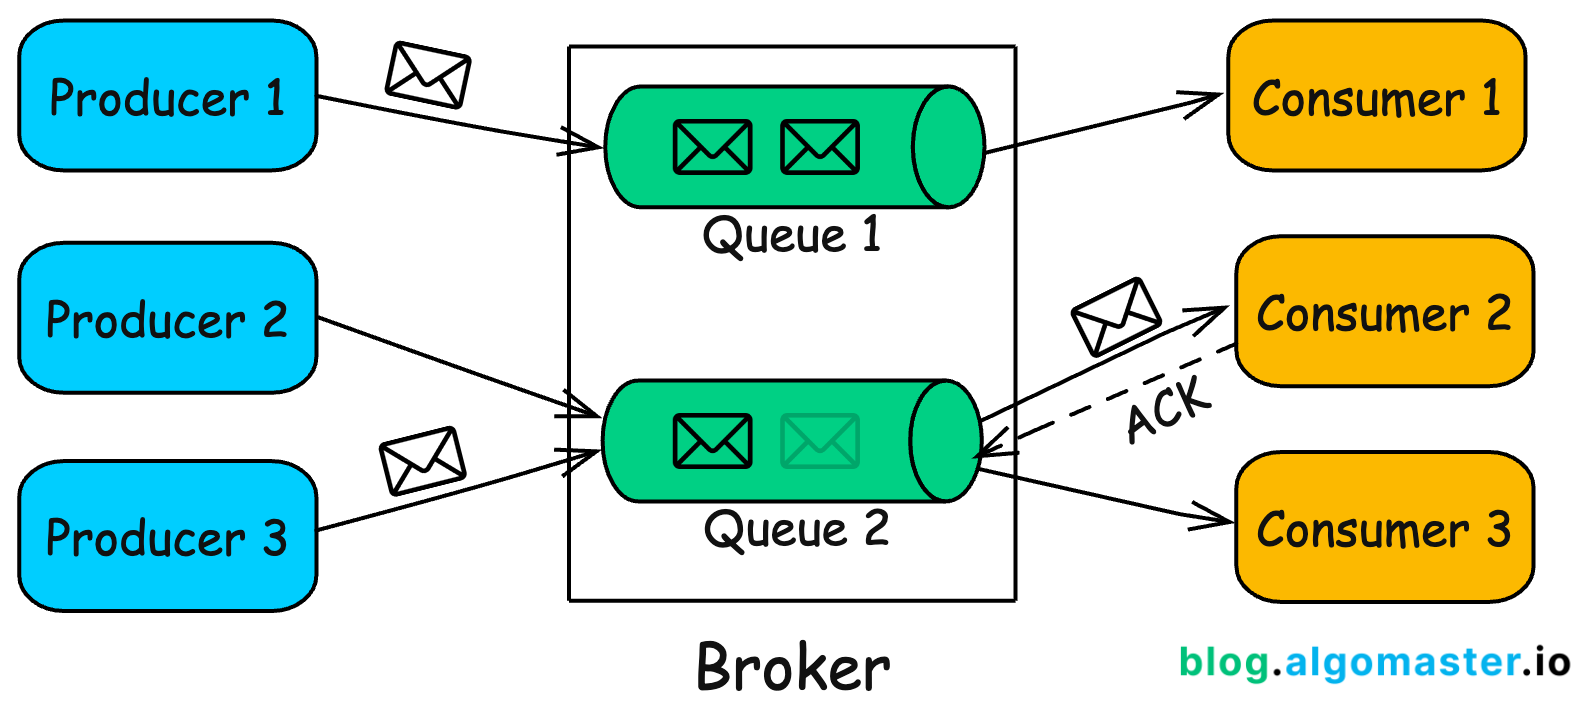

In [28]:
display(Image(filename='Utils/28.png'))

Why ?? 

In a monolithic system, functions call each other directly and wait for a response.
But in a microservices-based system, this approach is inefficient because:

1. If one service is slow or down, everything waits.

2. High traffic can **overload** a single service.

3. **Synchronous communication** (waiting for immediate responses) doesn’t scale well.

**A Message Queue enables services to communicate asynchronously, allowing requests to be processed without blocking other operations.**

How It Works:

1. A producer (e.g., checkout service) **places a message** in the queue (e.g., "Process Payment").

2. The queue temporarily **holds the message** until a consumer (e.g., payment service) is ready to process it.

3. The consumer retrieves the message and processes it.

In case of async.

| Step | Action                                                       | **Service**                                | **Role**                                                                       |
| ---- | ------------------------------------------------------------ | ------------------------------------------ | ------------------------------------------------------------------------------ |
| 1️⃣  | User clicks “Place Order”                                    | **Order Service**                          | **Producer** — it creates a message “Order Created” and sends it to the queue. |
| 2️⃣  | Message stored temporarily                                   | **Message Queue (RabbitMQ / Kafka / SQS)** | **Middle layer** — holds messages safely until processed.                      |
| 3️⃣  | Payment Service listens for new messages                     | **Payment Service**                        | **Consumer** — it receives the “Order Created” event and processes payment.    |
| 4️⃣  | Payment Service publishes another event “Payment Successful” | **Payment Service**                        | **Producer (again)** — now it produces a new message for others.               |
| 5️⃣  | Notification Service listens for “Payment Successful”        | **Notification Service**                   | **Consumer** — sends email or SMS.                                             |


Note : 
1. Amazon, Flipkart: use async flow for order → payment → email
(user sees “order placed” instantly, payment processed in background)
2. Bank Transfers: use sync when strong consistency needed (e.g., debit-credit must match immediately)



1. In async, even if notification service is down, user is satisfied that payment is successful and order is placed.

2. In sync, the whole chain blocks until all services respond.

3. We break that chain using a message queue (event-driven flow).

**We use asynchronous message queues when we want the system to be fast, scalable, and resilient, even if it means data consistency is delayed for a few seconds.** ( you will get to learn about this later)

1. Using message queues, we can decouple services and improve the scalability and fault tolerance

2. Common message queue systems include: Apache Kafka, Amazon SQS and RabbitMQ.

3. Using message queues, we can prevent overload on internal services within our system.

**But But... how do we prevent overload for the public APIs and services we deploy.**

There we use rate limiting.

## 28. Rate Limiting 